In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# Data preparation

In [2]:
df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KATOTTG_2023': str, 'EDRPOU_school': str})
df_students.columns

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/1080893059.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_students = pd.read_csv('../tables_creation/final_tables/students.csv', dtype={'KATOTTG_2023': str, 'EDRPOU_school': str})


Index(['outid', 'birth', 'sextypename', 'classprofilename', 'regtypename',
       'classlangname', 'KATOTTG_2023', 'EDRPOU_school', 'year', 'status'],
      dtype='object')

In [3]:
df_students = df_students[['outid', 'birth', 'sextypename', 'KATOTTG_2023', 'year', 'EDRPOU_school', 'status']]
df_students

outid  birth sextypename  \
0        a99c6c63-aa70-4aec-ba42-370f7261e857   1998        Male   
1        c3136421-569e-422e-ae8f-41c4c931fd70   1998      Female   
2        30de395e-7a74-452a-8370-6856d240fbfb   1999        Male   
3        852ca6ab-7fbd-40ad-ae51-39dc94edc9e1   1999      Female   
4        bc9b70ca-c091-440f-b1de-f04b308f3a54   1999        Male   
...                                       ...    ...         ...   
2490047  98f773cf-4b79-425b-a415-2eb5dd097199   2003        Male   
2490048  98dc27ec-1801-4741-b8f7-3a2ca8b6e772   1996      Female   
2490049  995cc588-5c44-45bd-8f0c-3f70ff1e746e   2004      Female   
2490050  98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24   2005      Female   
2490051  98de6ea2-28f3-4951-990a-9a3ff45449de   2004        Male   

                KATOTTG_2023  year EDRPOU_school  \
0        UA23080270010078454  2016      26373098   
1        UA68040210010032567  2016      25880114   
2        UA73060610010033137  2016      21431046   
3        UA14120030010055241  2016      25705061   
4        UA61040490010069060  2016      14040173   
...                      ...   ...           ...   
2490047  UA59020070010054283  2023           NaN   
2490048  UA32100010010059200  2023           NaN   
2490049  UA56080170010061049  2023           NaN   
2490050  UA51100270010320268  2023           NaN   
2490051  UA07060190010068509  2023           NaN   

                                                    status  
0        A graduate of an Ukrainian school of the curre...  
1        A graduate of an Ukrainian school of the curre...  
2        A graduate of an Ukrainian school of the curre...  
3        A graduate of an Ukrainian school of the curre...  
4        A graduate of an Ukrainian school of the curre...  
...                                                    ...  
2490047                       A graduate of previous years  
2490048                       A graduate of previous years  
2490049                       A graduate of previous years  
2490050                       A graduate of previous years  
2490051                       A graduate of previous years  

[2490052 rows x 7 columns]

In [4]:
df_students['age'] = df_students['year']-df_students['birth']
df_students.drop('birth', axis = 1, inplace=True)
df_students

outid sextypename  \
0        a99c6c63-aa70-4aec-ba42-370f7261e857        Male   
1        c3136421-569e-422e-ae8f-41c4c931fd70      Female   
2        30de395e-7a74-452a-8370-6856d240fbfb        Male   
3        852ca6ab-7fbd-40ad-ae51-39dc94edc9e1      Female   
4        bc9b70ca-c091-440f-b1de-f04b308f3a54        Male   
...                                       ...         ...   
2490047  98f773cf-4b79-425b-a415-2eb5dd097199        Male   
2490048  98dc27ec-1801-4741-b8f7-3a2ca8b6e772      Female   
2490049  995cc588-5c44-45bd-8f0c-3f70ff1e746e      Female   
2490050  98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24      Female   
2490051  98de6ea2-28f3-4951-990a-9a3ff45449de        Male   

                KATOTTG_2023  year EDRPOU_school  \
0        UA23080270010078454  2016      26373098   
1        UA68040210010032567  2016      25880114   
2        UA73060610010033137  2016      21431046   
3        UA14120030010055241  2016      25705061   
4        UA61040490010069060  2016      14040173   
...                      ...   ...           ...   
2490047  UA59020070010054283  2023           NaN   
2490048  UA32100010010059200  2023           NaN   
2490049  UA56080170010061049  2023           NaN   
2490050  UA51100270010320268  2023           NaN   
2490051  UA07060190010068509  2023           NaN   

                                                    status  age  
0        A graduate of an Ukrainian school of the curre...   18  
1        A graduate of an Ukrainian school of the curre...   18  
2        A graduate of an Ukrainian school of the curre...   17  
3        A graduate of an Ukrainian school of the curre...   17  
4        A graduate of an Ukrainian school of the curre...   17  
...                                                    ...  ...  
2490047                       A graduate of previous years   20  
2490048                       A graduate of previous years   27  
2490049                       A graduate of previous years   19  
2490050                       A graduate of previous years   18  
2490051                       A graduate of previous years   19  

[2490052 rows x 7 columns]

In [5]:
df_location = pd.read_csv('../tables_creation/final_tables/locations_base.csv', dtype={'KOATUU_2020': str, 'KATOTTG_2023': str})
df_location = df_location.drop_duplicates(subset=['KATOTTG_2023'], keep='first')
df_location.head()

KATOTTG_2023 KOATUU_2020    category             ukrainian_name  \
0  UA01000000000013043  0100000000      region  Автономна Республіка Крим   
1  UA01020000000022387  0120400000    district            Бахчисарайський   
2  UA01020010000048857  8536990200     hromada               Андріївська    
3  UA01020010010075540  8536990201     village                  Андріївка   
4  UA01020010020030666  8536990203  settlement                   Сонячний   

                english_name  
0  Avtonomna Respublika Krym  
1           Bakhchysaraiskyi  
2                        NaN  
3                        NaN  
4                        NaN

In [6]:
region_df=df_location[df_location.category.isin(['region', 'capital'])][['KATOTTG_2023', 'english_name']]
region_df['KATOTTG_2023_region'] = region_df['KATOTTG_2023'].str[:4]
region_df.drop(columns='KATOTTG_2023', inplace=True)
region_df.reset_index(inplace=True, drop=True)
region_df

english_name KATOTTG_2023_region
0   Avtonomna Respublika Krym                UA01
1                   Vinnytska                UA05
2                    Volynska                UA07
3             Dnipropetrovska                UA12
4                    Donetska                UA14
5                 Zhytomyrskа                UA18
6                 Zakarpatska                UA21
7                   Zaporizka                UA23
8            Ivano-Frankivska                UA26
9                     Kyivska                UA32
10              Kirovohradska                UA35
11                   Luhanska                UA44
12                    Lvivska                UA46
13                Mykolaivska                UA48
14                     Odeska                UA51
15                  Poltavska                UA53
16                  Rivnenska                UA56
17                     Sumska                UA59
18                Ternopilska                UA61
19                 Kharkivska                UA63
20                 Khersonska                UA65
21                Khmelnytska                UA68
22                  Cherkaska                UA71
23               Chernivetska                UA73
24               Chernihivska                UA74
25                       Kyiv                UA80
26                 Sevastopol                UA85

In [7]:
abroad_df=df_location[(df_location.category=='abroad')&(df_location.KATOTTG_2023.str[4:6]=='00')][['KATOTTG_2023', 'english_name']]
abroad_df['KATOTTG_2023_region'] = abroad_df['KATOTTG_2023'].str[:4]
abroad_df.drop(columns='KATOTTG_2023', inplace=True)
abroad_df.reset_index(inplace=True, drop=True)
abroad_df

english_name KATOTTG_2023_region
0                    Ireland                OC01
1                      Spain                OC02
2                      Italy                OC03
3                 Azerbaijan                OC04
4                     Austia                OC05
5                    Belgium                OC06
6                   Bulgaria                OC07
7             United Kingdom                OC08
8                     Greece                OC09
9                    Georgia                OC10
10                   Denmark                OC11
11                   Estonia                OC12
12                    Canada                OC13
13                    Latvia                OC14
14                 Lithuania                OC15
15                Luxembourg                OC16
16                   Moldova                OC17
17               Netherlands                OC18
18                   Germany                OC19
19                    Norway                OC20
20                    Poland                OC21
21                  Portugal                OC22
22                   Romania                OC23
23                  Slovakia                OC24
24                  Slovenia                OC25
25  United States of America                OC26
26                    Turkey                OC27
27                   Hungary                OC28
28                   Finland                OC29
29                    France                OC30
30                   Croatia                OC31
31                   Czechia                OC32
32               Switzerland                OC33
33                    Sweden                OC34

In [8]:
df_students_region = df_students.merge(df_location[['KATOTTG_2023', 'category']], on = ['KATOTTG_2023'], how = 'left')
df_students_region['KATOTTG_2023_region']=df_students_region['KATOTTG_2023'].str[:4]
df_students_region

outid sextypename  \
0        a99c6c63-aa70-4aec-ba42-370f7261e857        Male   
1        c3136421-569e-422e-ae8f-41c4c931fd70      Female   
2        30de395e-7a74-452a-8370-6856d240fbfb        Male   
3        852ca6ab-7fbd-40ad-ae51-39dc94edc9e1      Female   
4        bc9b70ca-c091-440f-b1de-f04b308f3a54        Male   
...                                       ...         ...   
2490047  98f773cf-4b79-425b-a415-2eb5dd097199        Male   
2490048  98dc27ec-1801-4741-b8f7-3a2ca8b6e772      Female   
2490049  995cc588-5c44-45bd-8f0c-3f70ff1e746e      Female   
2490050  98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24      Female   
2490051  98de6ea2-28f3-4951-990a-9a3ff45449de        Male   

                KATOTTG_2023  year EDRPOU_school  \
0        UA23080270010078454  2016      26373098   
1        UA68040210010032567  2016      25880114   
2        UA73060610010033137  2016      21431046   
3        UA14120030010055241  2016      25705061   
4        UA61040490010069060  2016      14040173   
...                      ...   ...           ...   
2490047  UA59020070010054283  2023           NaN   
2490048  UA32100010010059200  2023           NaN   
2490049  UA56080170010061049  2023           NaN   
2490050  UA51100270010320268  2023           NaN   
2490051  UA07060190010068509  2023           NaN   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   18   
1        A graduate of an Ukrainian school of the curre...   18   
2        A graduate of an Ukrainian school of the curre...   17   
3        A graduate of an Ukrainian school of the curre...   17   
4        A graduate of an Ukrainian school of the curre...   17   
...                                                    ...  ...   
2490047                       A graduate of previous years   20   
2490048                       A graduate of previous years   27   
2490049                       A graduate of previous years   19   
2490050                       A graduate of previous years   18   
2490051                       A graduate of previous years   19   

                    category KATOTTG_2023_region  
0                    village                UA23  
1                       city                UA68  
2                       city                UA73  
3                       city                UA14  
4                       city                UA61  
...                      ...                 ...  
2490047                 city                UA59  
2490048                 city                UA32  
2490049                 city                UA56  
2490050  districts in cities                UA51  
2490051                 city                UA07  

[2490052 rows x 9 columns]

In [9]:
df_students_region = df_students_region.merge(region_df, on = ['KATOTTG_2023_region'], how = 'left')
df_students_region 

outid sextypename  \
0        a99c6c63-aa70-4aec-ba42-370f7261e857        Male   
1        c3136421-569e-422e-ae8f-41c4c931fd70      Female   
2        30de395e-7a74-452a-8370-6856d240fbfb        Male   
3        852ca6ab-7fbd-40ad-ae51-39dc94edc9e1      Female   
4        bc9b70ca-c091-440f-b1de-f04b308f3a54        Male   
...                                       ...         ...   
2490047  98f773cf-4b79-425b-a415-2eb5dd097199        Male   
2490048  98dc27ec-1801-4741-b8f7-3a2ca8b6e772      Female   
2490049  995cc588-5c44-45bd-8f0c-3f70ff1e746e      Female   
2490050  98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24      Female   
2490051  98de6ea2-28f3-4951-990a-9a3ff45449de        Male   

                KATOTTG_2023  year EDRPOU_school  \
0        UA23080270010078454  2016      26373098   
1        UA68040210010032567  2016      25880114   
2        UA73060610010033137  2016      21431046   
3        UA14120030010055241  2016      25705061   
4        UA61040490010069060  2016      14040173   
...                      ...   ...           ...   
2490047  UA59020070010054283  2023           NaN   
2490048  UA32100010010059200  2023           NaN   
2490049  UA56080170010061049  2023           NaN   
2490050  UA51100270010320268  2023           NaN   
2490051  UA07060190010068509  2023           NaN   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   18   
1        A graduate of an Ukrainian school of the curre...   18   
2        A graduate of an Ukrainian school of the curre...   17   
3        A graduate of an Ukrainian school of the curre...   17   
4        A graduate of an Ukrainian school of the curre...   17   
...                                                    ...  ...   
2490047                       A graduate of previous years   20   
2490048                       A graduate of previous years   27   
2490049                       A graduate of previous years   19   
2490050                       A graduate of previous years   18   
2490051                       A graduate of previous years   19   

                    category KATOTTG_2023_region  english_name  
0                    village                UA23     Zaporizka  
1                       city                UA68   Khmelnytska  
2                       city                UA73  Chernivetska  
3                       city                UA14      Donetska  
4                       city                UA61   Ternopilska  
...                      ...                 ...           ...  
2490047                 city                UA59        Sumska  
2490048                 city                UA32       Kyivska  
2490049                 city                UA56     Rivnenska  
2490050  districts in cities                UA51        Odeska  
2490051                 city                UA07      Volynska  

[2490052 rows x 10 columns]

In [10]:
df_students_region = df_students_region.merge(abroad_df, on = ['KATOTTG_2023_region'], how = 'left')
df_students_region 

outid sextypename  \
0        a99c6c63-aa70-4aec-ba42-370f7261e857        Male   
1        c3136421-569e-422e-ae8f-41c4c931fd70      Female   
2        30de395e-7a74-452a-8370-6856d240fbfb        Male   
3        852ca6ab-7fbd-40ad-ae51-39dc94edc9e1      Female   
4        bc9b70ca-c091-440f-b1de-f04b308f3a54        Male   
...                                       ...         ...   
2490047  98f773cf-4b79-425b-a415-2eb5dd097199        Male   
2490048  98dc27ec-1801-4741-b8f7-3a2ca8b6e772      Female   
2490049  995cc588-5c44-45bd-8f0c-3f70ff1e746e      Female   
2490050  98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24      Female   
2490051  98de6ea2-28f3-4951-990a-9a3ff45449de        Male   

                KATOTTG_2023  year EDRPOU_school  \
0        UA23080270010078454  2016      26373098   
1        UA68040210010032567  2016      25880114   
2        UA73060610010033137  2016      21431046   
3        UA14120030010055241  2016      25705061   
4        UA61040490010069060  2016      14040173   
...                      ...   ...           ...   
2490047  UA59020070010054283  2023           NaN   
2490048  UA32100010010059200  2023           NaN   
2490049  UA56080170010061049  2023           NaN   
2490050  UA51100270010320268  2023           NaN   
2490051  UA07060190010068509  2023           NaN   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   18   
1        A graduate of an Ukrainian school of the curre...   18   
2        A graduate of an Ukrainian school of the curre...   17   
3        A graduate of an Ukrainian school of the curre...   17   
4        A graduate of an Ukrainian school of the curre...   17   
...                                                    ...  ...   
2490047                       A graduate of previous years   20   
2490048                       A graduate of previous years   27   
2490049                       A graduate of previous years   19   
2490050                       A graduate of previous years   18   
2490051                       A graduate of previous years   19   

                    category KATOTTG_2023_region english_name_x english_name_y  
0                    village                UA23      Zaporizka            NaN  
1                       city                UA68    Khmelnytska            NaN  
2                       city                UA73   Chernivetska            NaN  
3                       city                UA14       Donetska            NaN  
4                       city                UA61    Ternopilska            NaN  
...                      ...                 ...            ...            ...  
2490047                 city                UA59         Sumska            NaN  
2490048                 city                UA32        Kyivska            NaN  
2490049                 city                UA56      Rivnenska            NaN  
2490050  districts in cities                UA51         Odeska            NaN  
2490051                 city                UA07       Volynska            NaN  

[2490052 rows x 11 columns]

In [11]:
df_students_region.loc[df_students_region.english_name_x.isna(), 'english_name_x'] =df_students_region.english_name_y

In [12]:
df_students_region.drop(columns='english_name_y', inplace=True)
df_students_region.rename(columns={'english_name_x':'region_name'}, inplace=True)
df_students_region

outid sextypename  \
0        a99c6c63-aa70-4aec-ba42-370f7261e857        Male   
1        c3136421-569e-422e-ae8f-41c4c931fd70      Female   
2        30de395e-7a74-452a-8370-6856d240fbfb        Male   
3        852ca6ab-7fbd-40ad-ae51-39dc94edc9e1      Female   
4        bc9b70ca-c091-440f-b1de-f04b308f3a54        Male   
...                                       ...         ...   
2490047  98f773cf-4b79-425b-a415-2eb5dd097199        Male   
2490048  98dc27ec-1801-4741-b8f7-3a2ca8b6e772      Female   
2490049  995cc588-5c44-45bd-8f0c-3f70ff1e746e      Female   
2490050  98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24      Female   
2490051  98de6ea2-28f3-4951-990a-9a3ff45449de        Male   

                KATOTTG_2023  year EDRPOU_school  \
0        UA23080270010078454  2016      26373098   
1        UA68040210010032567  2016      25880114   
2        UA73060610010033137  2016      21431046   
3        UA14120030010055241  2016      25705061   
4        UA61040490010069060  2016      14040173   
...                      ...   ...           ...   
2490047  UA59020070010054283  2023           NaN   
2490048  UA32100010010059200  2023           NaN   
2490049  UA56080170010061049  2023           NaN   
2490050  UA51100270010320268  2023           NaN   
2490051  UA07060190010068509  2023           NaN   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   18   
1        A graduate of an Ukrainian school of the curre...   18   
2        A graduate of an Ukrainian school of the curre...   17   
3        A graduate of an Ukrainian school of the curre...   17   
4        A graduate of an Ukrainian school of the curre...   17   
...                                                    ...  ...   
2490047                       A graduate of previous years   20   
2490048                       A graduate of previous years   27   
2490049                       A graduate of previous years   19   
2490050                       A graduate of previous years   18   
2490051                       A graduate of previous years   19   

                    category KATOTTG_2023_region   region_name  
0                    village                UA23     Zaporizka  
1                       city                UA68   Khmelnytska  
2                       city                UA73  Chernivetska  
3                       city                UA14      Donetska  
4                       city                UA61   Ternopilska  
...                      ...                 ...           ...  
2490047                 city                UA59        Sumska  
2490048                 city                UA32       Kyivska  
2490049                 city                UA56     Rivnenska  
2490050  districts in cities                UA51        Odeska  
2490051                 city                UA07      Volynska  

[2490052 rows x 10 columns]

In [13]:
df_students_region[df_students_region.region_name.isna()]

Empty DataFrame
Columns: [outid, sextypename, KATOTTG_2023, year, EDRPOU_school, status, age, category, KATOTTG_2023_region, region_name]
Index: []

In [14]:
df_students_region.region_name.unique()

array(['Zaporizka', 'Khmelnytska', 'Chernivetska', 'Donetska',
       'Ternopilska', 'Kirovohradska', 'Odeska', 'Dnipropetrovska',
       'Lvivska', 'Ivano-Frankivska', 'Kharkivska', 'Cherkaska',
       'Volynska', 'Poltavska', 'Rivnenska', 'Vinnytska', 'Chernihivska',
       'Kyivska', 'Zakarpatska', 'Kyiv', 'Zhytomyrskа', 'Mykolaivska',
       'Khersonska', 'Luhanska', 'Sumska', 'Poland', 'France', 'Germany',
       'Estonia', 'Norway', 'Slovakia', 'Austia', 'United Kingdom',
       'Ireland', 'Bulgaria', 'Moldova', 'Portugal', 'Azerbaijan',
       'Hungary', 'Italy', 'Turkey', 'Czechia', 'Belgium', 'Spain',
       'Canada', 'Croatia', 'Latvia', 'Romania', 'Lithuania', 'Georgia',
       'United States of America', 'Finland', 'Sweden', 'Luxembourg',
       'Netherlands', 'Denmark', 'Switzerland'], dtype=object)

In [15]:
df_students_region['abroad'] = df_students_region['KATOTTG_2023_region'].map(lambda x: 1 if x[:2] == 'OC' else 0)
df_students_region.drop(['KATOTTG_2023', 'KATOTTG_2023_region'], axis = 1, inplace=True)
df_students_region

outid sextypename  year EDRPOU_school  \
0        a99c6c63-aa70-4aec-ba42-370f7261e857        Male  2016      26373098   
1        c3136421-569e-422e-ae8f-41c4c931fd70      Female  2016      25880114   
2        30de395e-7a74-452a-8370-6856d240fbfb        Male  2016      21431046   
3        852ca6ab-7fbd-40ad-ae51-39dc94edc9e1      Female  2016      25705061   
4        bc9b70ca-c091-440f-b1de-f04b308f3a54        Male  2016      14040173   
...                                       ...         ...   ...           ...   
2490047  98f773cf-4b79-425b-a415-2eb5dd097199        Male  2023           NaN   
2490048  98dc27ec-1801-4741-b8f7-3a2ca8b6e772      Female  2023           NaN   
2490049  995cc588-5c44-45bd-8f0c-3f70ff1e746e      Female  2023           NaN   
2490050  98fc3ab5-1d6c-44ec-8e5e-3fd5e1dd3d24      Female  2023           NaN   
2490051  98de6ea2-28f3-4951-990a-9a3ff45449de        Male  2023           NaN   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   18   
1        A graduate of an Ukrainian school of the curre...   18   
2        A graduate of an Ukrainian school of the curre...   17   
3        A graduate of an Ukrainian school of the curre...   17   
4        A graduate of an Ukrainian school of the curre...   17   
...                                                    ...  ...   
2490047                       A graduate of previous years   20   
2490048                       A graduate of previous years   27   
2490049                       A graduate of previous years   19   
2490050                       A graduate of previous years   18   
2490051                       A graduate of previous years   19   

                    category   region_name  abroad  
0                    village     Zaporizka       0  
1                       city   Khmelnytska       0  
2                       city  Chernivetska       0  
3                       city      Donetska       0  
4                       city   Ternopilska       0  
...                      ...           ...     ...  
2490047                 city        Sumska       0  
2490048                 city       Kyivska       0  
2490049                 city     Rivnenska       0  
2490050  districts in cities        Odeska       0  
2490051                 city      Volynska       0  

[2490052 rows x 9 columns]

In [16]:
df_st_take_test = pd.read_csv('../tables_creation/final_tables/students_take_tests.csv',  dtype={'KATOTTG_2023_test_center': str, 'EDRPOU_test_center':str})
df_st_take_test.test_status.unique()

array(['Accepted', 'Absent', 'Failed', 'Canceled', 'Not selected 100-200',
       'Not registered for the main session'], dtype=object)

In [17]:

# df_st_take_test.dropna(subset = ['KOATUU_2020_test_center'], inplace=True)
df_st_take_test = df_st_take_test[(df_st_take_test.test_status != 'Not registered for the main session') & (df_st_take_test.test_status != 'Absent')]
df_st_take_test

outid  year  score100  score12  \
0         00000AC7-CDDE-4C77-B979-8B0351AF1305  2017     161.0      9.0   
2         00001a8d-fff5-4c7c-bea2-b0157f7c5655  2021     128.0      6.0   
3         0000268f-9fdd-49b2-9ee2-422778c9c4f1  2016     160.0      8.0   
4         0000324e-f525-49c4-a963-8df0cc02d6d5  2018     166.0      9.0   
5         0000333b-1b93-4386-a148-3d9613bbe324  2019     127.0      6.0   
...                                        ...   ...       ...      ...   
10597955  ffefcbd5-3a81-4002-aa62-daa56780bee1  2021       NaN      4.0   
10597956  fff10f71-3684-44e7-ab9f-4fe66f8a7c7e  2021       NaN      2.0   
10597958  fff46cdd-592b-413a-b560-16f74641cc88  2021       NaN      1.0   
10597959  fff53263-c6df-4b43-b444-edd7b68c7e11  2021       NaN      5.0   
10597968  fffcc91f-f0a1-4a79-84b8-31b42e3b5547  2021       NaN      2.0   

          score           test_status test_subject test_type  \
0           NaN              Accepted      ukrtest       EIE   
2          31.0              Accepted      ukrtest       EIE   
3           NaN              Accepted      ukrtest       EIE   
4          69.0              Accepted      ukrtest       EIE   
5          38.0              Accepted      ukrtest       EIE   
...         ...                   ...          ...       ...   
10597955    NaN  Not selected 100-200   mathsttest       EIE   
10597956    NaN  Not selected 100-200   mathsttest       EIE   
10597958    NaN              Canceled   mathsttest       EIE   
10597959    NaN  Not selected 100-200   mathsttest       EIE   
10597968    NaN  Not selected 100-200   mathsttest       EIE   

         KATOTTG_2023_test_center EDRPOU_test_center  
0             UA51100270010275193           20995060  
2             UA71080490010144486           25922746  
3             UA63120270010216514           24486622  
4             UA46100230010074173           34387362  
5             UA14160210010099403           25701896  
...                           ...                ...  
10597955      UA46120090010078401           22375315  
10597956      UA65060170010075325           24951295  
10597958      UA26040190010045761           02544307  
10597959      UA12020010010231764           02541361  
10597968      UA21100230010016545           22110427  

[7158957 rows x 10 columns]

In [18]:
df = df_st_take_test.merge(df_students_region, on = ['outid', 'year'], how = 'left')
df

outid  year  score100  score12  score  \
0        00000AC7-CDDE-4C77-B979-8B0351AF1305  2017     161.0      9.0    NaN   
1        00001a8d-fff5-4c7c-bea2-b0157f7c5655  2021     128.0      6.0   31.0   
2        0000268f-9fdd-49b2-9ee2-422778c9c4f1  2016     160.0      8.0    NaN   
3        0000324e-f525-49c4-a963-8df0cc02d6d5  2018     166.0      9.0   69.0   
4        0000333b-1b93-4386-a148-3d9613bbe324  2019     127.0      6.0   38.0   
...                                       ...   ...       ...      ...    ...   
7158952  ffefcbd5-3a81-4002-aa62-daa56780bee1  2021       NaN      4.0    NaN   
7158953  fff10f71-3684-44e7-ab9f-4fe66f8a7c7e  2021       NaN      2.0    NaN   
7158954  fff46cdd-592b-413a-b560-16f74641cc88  2021       NaN      1.0    NaN   
7158955  fff53263-c6df-4b43-b444-edd7b68c7e11  2021       NaN      5.0    NaN   
7158956  fffcc91f-f0a1-4a79-84b8-31b42e3b5547  2021       NaN      2.0    NaN   

                  test_status test_subject test_type KATOTTG_2023_test_center  \
0                    Accepted      ukrtest       EIE      UA51100270010275193   
1                    Accepted      ukrtest       EIE      UA71080490010144486   
2                    Accepted      ukrtest       EIE      UA63120270010216514   
3                    Accepted      ukrtest       EIE      UA46100230010074173   
4                    Accepted      ukrtest       EIE      UA14160210010099403   
...                       ...          ...       ...                      ...   
7158952  Not selected 100-200   mathsttest       EIE      UA46120090010078401   
7158953  Not selected 100-200   mathsttest       EIE      UA65060170010075325   
7158954              Canceled   mathsttest       EIE      UA26040190010045761   
7158955  Not selected 100-200   mathsttest       EIE      UA12020010010231764   
7158956  Not selected 100-200   mathsttest       EIE      UA21100230010016545   

        EDRPOU_test_center sextypename EDRPOU_school  \
0                 20995060      Female      23864660   
1                 25922746        Male      05538052   
2                 24486622        Male      23320374   
3                 34387362        Male      20773804   
4                 25701896      Female      02135833   
...                    ...         ...           ...   
7158952           22375315      Female      22375315   
7158953           24951295        Male      02548162   
7158954           02544307        Male      38546627   
7158955           02541361      Female      26462809   
7158956           22110427      Female      22098181   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   17   
1        A graduate of a vocational pre-higher educatio...   19   
2        A graduate of an Ukrainian school of the curre...   18   
3        A graduate of an Ukrainian school of the curre...   17   
4        A graduate of a vocational pre-higher educatio...   17   
...                                                    ...  ...   
7158952  A graduate of an Ukrainian school of the curre...   17   
7158953  A graduate of a vocational pre-higher educatio...   19   
7158954  A graduate of a vocational pre-higher educatio...   17   
7158955  A graduate of an Ukrainian school of the curre...   17   
7158956  A graduate of an Ukrainian school of the curre...   17   

                    category       region_name  abroad  
0        districts in cities            Odeska       0  
1        districts in cities         Cherkaska       0  
2        districts in cities        Kharkivska       0  
3                       city           Lvivska       0  
4                       city          Donetska       0  
...                      ...               ...     ...  
7158952                 city           Lvivska       0  
7158953                 city        Khersonska       0  
7158954                 city  Ivano-Frankivska       0  
7158955  districts in cities   Dnipropetrovska

In [19]:
df_location_test_center = df_location.rename(columns={'KATOTTG_2023':'KATOTTG_2023_test_center', 'category':'category_test_center'})

In [20]:
df = df.merge(df_location_test_center[['KATOTTG_2023_test_center', 'category_test_center']], on = ['KATOTTG_2023_test_center'], how = 'left')
df['KATOTTG_2023_region_test_center']=df['KATOTTG_2023_test_center'].str[:4]
df

outid  year  score100  score12  score  \
0        00000AC7-CDDE-4C77-B979-8B0351AF1305  2017     161.0      9.0    NaN   
1        00001a8d-fff5-4c7c-bea2-b0157f7c5655  2021     128.0      6.0   31.0   
2        0000268f-9fdd-49b2-9ee2-422778c9c4f1  2016     160.0      8.0    NaN   
3        0000324e-f525-49c4-a963-8df0cc02d6d5  2018     166.0      9.0   69.0   
4        0000333b-1b93-4386-a148-3d9613bbe324  2019     127.0      6.0   38.0   
...                                       ...   ...       ...      ...    ...   
7158952  ffefcbd5-3a81-4002-aa62-daa56780bee1  2021       NaN      4.0    NaN   
7158953  fff10f71-3684-44e7-ab9f-4fe66f8a7c7e  2021       NaN      2.0    NaN   
7158954  fff46cdd-592b-413a-b560-16f74641cc88  2021       NaN      1.0    NaN   
7158955  fff53263-c6df-4b43-b444-edd7b68c7e11  2021       NaN      5.0    NaN   
7158956  fffcc91f-f0a1-4a79-84b8-31b42e3b5547  2021       NaN      2.0    NaN   

                  test_status test_subject test_type KATOTTG_2023_test_center  \
0                    Accepted      ukrtest       EIE      UA51100270010275193   
1                    Accepted      ukrtest       EIE      UA71080490010144486   
2                    Accepted      ukrtest       EIE      UA63120270010216514   
3                    Accepted      ukrtest       EIE      UA46100230010074173   
4                    Accepted      ukrtest       EIE      UA14160210010099403   
...                       ...          ...       ...                      ...   
7158952  Not selected 100-200   mathsttest       EIE      UA46120090010078401   
7158953  Not selected 100-200   mathsttest       EIE      UA65060170010075325   
7158954              Canceled   mathsttest       EIE      UA26040190010045761   
7158955  Not selected 100-200   mathsttest       EIE      UA12020010010231764   
7158956  Not selected 100-200   mathsttest       EIE      UA21100230010016545   

        EDRPOU_test_center sextypename EDRPOU_school  \
0                 20995060      Female      23864660   
1                 25922746        Male      05538052   
2                 24486622        Male      23320374   
3                 34387362        Male      20773804   
4                 25701896      Female      02135833   
...                    ...         ...           ...   
7158952           22375315      Female      22375315   
7158953           24951295        Male      02548162   
7158954           02544307        Male      38546627   
7158955           02541361      Female      26462809   
7158956           22110427      Female      22098181   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   17   
1        A graduate of a vocational pre-higher educatio...   19   
2        A graduate of an Ukrainian school of the curre...   18   
3        A graduate of an Ukrainian school of the curre...   17   
4        A graduate of a vocational pre-higher educatio...   17   
...                                                    ...  ...   
7158952  A graduate of an Ukrainian school of the curre...   17   
7158953  A graduate of a vocational pre-higher educatio...   19   
7158954  A graduate of a vocational pre-higher educatio...   17   
7158955  A graduate of an Ukrainian school of the curre...   17   
7158956  A graduate of an Ukrainian school of the curre...   17   

                    category       region_name  abroad category_test_center  \
0        districts in cities            Odeska       0  districts in cities   
1        districts in cities         Cherkaska       0  districts in cities   
2        districts in cities        Kharkivska       0  districts in cities   
3                       city           Lvivska       0                 city   
4                       city          Donetska       0                 city   
...                      ...               ...     ...                  ...   
7158952                 city           Lvivska       0         

In [21]:
region_df_ukr=df_location_test_center[df_location_test_center.category_test_center.isin(['region', 'capital'])][['KATOTTG_2023_test_center', 'english_name']]
region_df_ukr['KATOTTG_2023_region_test_center'] = region_df_ukr['KATOTTG_2023_test_center'].str[:4]
region_df_ukr.drop(columns='KATOTTG_2023_test_center', inplace=True)
region_df_ukr.reset_index(inplace=True, drop=True)
region_df_ukr

english_name KATOTTG_2023_region_test_center
0   Avtonomna Respublika Krym                            UA01
1                   Vinnytska                            UA05
2                    Volynska                            UA07
3             Dnipropetrovska                            UA12
4                    Donetska                            UA14
5                 Zhytomyrskа                            UA18
6                 Zakarpatska                            UA21
7                   Zaporizka                            UA23
8            Ivano-Frankivska                            UA26
9                     Kyivska                            UA32
10              Kirovohradska                            UA35
11                   Luhanska                            UA44
12                    Lvivska                            UA46
13                Mykolaivska                            UA48
14                     Odeska                            UA51
15                  Poltavska                            UA53
16                  Rivnenska                            UA56
17                     Sumska                            UA59
18                Ternopilska                            UA61
19                 Kharkivska                            UA63
20                 Khersonska                            UA65
21                Khmelnytska                            UA68
22                  Cherkaska                            UA71
23               Chernivetska                            UA73
24               Chernihivska                            UA74
25                       Kyiv                            UA80
26                 Sevastopol                            UA85

In [22]:
df = df.merge(region_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df

outid  year  score100  score12  score  \
0        00000AC7-CDDE-4C77-B979-8B0351AF1305  2017     161.0      9.0    NaN   
1        00001a8d-fff5-4c7c-bea2-b0157f7c5655  2021     128.0      6.0   31.0   
2        0000268f-9fdd-49b2-9ee2-422778c9c4f1  2016     160.0      8.0    NaN   
3        0000324e-f525-49c4-a963-8df0cc02d6d5  2018     166.0      9.0   69.0   
4        0000333b-1b93-4386-a148-3d9613bbe324  2019     127.0      6.0   38.0   
...                                       ...   ...       ...      ...    ...   
7158952  ffefcbd5-3a81-4002-aa62-daa56780bee1  2021       NaN      4.0    NaN   
7158953  fff10f71-3684-44e7-ab9f-4fe66f8a7c7e  2021       NaN      2.0    NaN   
7158954  fff46cdd-592b-413a-b560-16f74641cc88  2021       NaN      1.0    NaN   
7158955  fff53263-c6df-4b43-b444-edd7b68c7e11  2021       NaN      5.0    NaN   
7158956  fffcc91f-f0a1-4a79-84b8-31b42e3b5547  2021       NaN      2.0    NaN   

                  test_status test_subject test_type KATOTTG_2023_test_center  \
0                    Accepted      ukrtest       EIE      UA51100270010275193   
1                    Accepted      ukrtest       EIE      UA71080490010144486   
2                    Accepted      ukrtest       EIE      UA63120270010216514   
3                    Accepted      ukrtest       EIE      UA46100230010074173   
4                    Accepted      ukrtest       EIE      UA14160210010099403   
...                       ...          ...       ...                      ...   
7158952  Not selected 100-200   mathsttest       EIE      UA46120090010078401   
7158953  Not selected 100-200   mathsttest       EIE      UA65060170010075325   
7158954              Canceled   mathsttest       EIE      UA26040190010045761   
7158955  Not selected 100-200   mathsttest       EIE      UA12020010010231764   
7158956  Not selected 100-200   mathsttest       EIE      UA21100230010016545   

        EDRPOU_test_center sextypename EDRPOU_school  \
0                 20995060      Female      23864660   
1                 25922746        Male      05538052   
2                 24486622        Male      23320374   
3                 34387362        Male      20773804   
4                 25701896      Female      02135833   
...                    ...         ...           ...   
7158952           22375315      Female      22375315   
7158953           24951295        Male      02548162   
7158954           02544307        Male      38546627   
7158955           02541361      Female      26462809   
7158956           22110427      Female      22098181   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   17   
1        A graduate of a vocational pre-higher educatio...   19   
2        A graduate of an Ukrainian school of the curre...   18   
3        A graduate of an Ukrainian school of the curre...   17   
4        A graduate of a vocational pre-higher educatio...   17   
...                                                    ...  ...   
7158952  A graduate of an Ukrainian school of the curre...   17   
7158953  A graduate of a vocational pre-higher educatio...   19   
7158954  A graduate of a vocational pre-higher educatio...   17   
7158955  A graduate of an Ukrainian school of the curre...   17   
7158956  A graduate of an Ukrainian school of the curre...   17   

                    category       region_name  abroad category_test_center  \
0        districts in cities            Odeska       0  districts in cities   
1        districts in cities         Cherkaska       0  districts in cities   
2        districts in cities        Kharkivska       0  districts in cities   
3                       city           Lvivska       0                 city   
4                       city          Donetska       0                 city   
...                      ...               ...     ...                  ...   
7158952                 city           Lvivska       0         

In [23]:
abroad_df_ukr=df_location_test_center[(df_location_test_center.category_test_center=='abroad')&(df_location_test_center.KATOTTG_2023_test_center.str[4:6]=='00')][['KATOTTG_2023_test_center', 'english_name']]
abroad_df_ukr['KATOTTG_2023_region_test_center'] = abroad_df_ukr['KATOTTG_2023_test_center'].str[:4]
abroad_df_ukr.drop(columns='KATOTTG_2023_test_center', inplace=True)
abroad_df_ukr.reset_index(inplace=True, drop=True)
abroad_df_ukr

english_name KATOTTG_2023_region_test_center
0                    Ireland                            OC01
1                      Spain                            OC02
2                      Italy                            OC03
3                 Azerbaijan                            OC04
4                     Austia                            OC05
5                    Belgium                            OC06
6                   Bulgaria                            OC07
7             United Kingdom                            OC08
8                     Greece                            OC09
9                    Georgia                            OC10
10                   Denmark                            OC11
11                   Estonia                            OC12
12                    Canada                            OC13
13                    Latvia                            OC14
14                 Lithuania                            OC15
15                Luxembourg                            OC16
16                   Moldova                            OC17
17               Netherlands                            OC18
18                   Germany                            OC19
19                    Norway                            OC20
20                    Poland                            OC21
21                  Portugal                            OC22
22                   Romania                            OC23
23                  Slovakia                            OC24
24                  Slovenia                            OC25
25  United States of America                            OC26
26                    Turkey                            OC27
27                   Hungary                            OC28
28                   Finland                            OC29
29                    France                            OC30
30                   Croatia                            OC31
31                   Czechia                            OC32
32               Switzerland                            OC33
33                    Sweden                            OC34

In [24]:
df = df.merge(abroad_df_ukr, on = ['KATOTTG_2023_region_test_center'], how = 'left')
df

outid  year  score100  score12  score  \
0        00000AC7-CDDE-4C77-B979-8B0351AF1305  2017     161.0      9.0    NaN   
1        00001a8d-fff5-4c7c-bea2-b0157f7c5655  2021     128.0      6.0   31.0   
2        0000268f-9fdd-49b2-9ee2-422778c9c4f1  2016     160.0      8.0    NaN   
3        0000324e-f525-49c4-a963-8df0cc02d6d5  2018     166.0      9.0   69.0   
4        0000333b-1b93-4386-a148-3d9613bbe324  2019     127.0      6.0   38.0   
...                                       ...   ...       ...      ...    ...   
7158952  ffefcbd5-3a81-4002-aa62-daa56780bee1  2021       NaN      4.0    NaN   
7158953  fff10f71-3684-44e7-ab9f-4fe66f8a7c7e  2021       NaN      2.0    NaN   
7158954  fff46cdd-592b-413a-b560-16f74641cc88  2021       NaN      1.0    NaN   
7158955  fff53263-c6df-4b43-b444-edd7b68c7e11  2021       NaN      5.0    NaN   
7158956  fffcc91f-f0a1-4a79-84b8-31b42e3b5547  2021       NaN      2.0    NaN   

                  test_status test_subject test_type KATOTTG_2023_test_center  \
0                    Accepted      ukrtest       EIE      UA51100270010275193   
1                    Accepted      ukrtest       EIE      UA71080490010144486   
2                    Accepted      ukrtest       EIE      UA63120270010216514   
3                    Accepted      ukrtest       EIE      UA46100230010074173   
4                    Accepted      ukrtest       EIE      UA14160210010099403   
...                       ...          ...       ...                      ...   
7158952  Not selected 100-200   mathsttest       EIE      UA46120090010078401   
7158953  Not selected 100-200   mathsttest       EIE      UA65060170010075325   
7158954              Canceled   mathsttest       EIE      UA26040190010045761   
7158955  Not selected 100-200   mathsttest       EIE      UA12020010010231764   
7158956  Not selected 100-200   mathsttest       EIE      UA21100230010016545   

        EDRPOU_test_center  ... EDRPOU_school  \
0                 20995060  ...      23864660   
1                 25922746  ...      05538052   
2                 24486622  ...      23320374   
3                 34387362  ...      20773804   
4                 25701896  ...      02135833   
...                    ...  ...           ...   
7158952           22375315  ...      22375315   
7158953           24951295  ...      02548162   
7158954           02544307  ...      38546627   
7158955           02541361  ...      26462809   
7158956           22110427  ...      22098181   

                                                    status age  \
0        A graduate of an Ukrainian school of the curre...  17   
1        A graduate of a vocational pre-higher educatio...  19   
2        A graduate of an Ukrainian school of the curre...  18   
3        A graduate of an Ukrainian school of the curre...  17   
4        A graduate of a vocational pre-higher educatio...  17   
...                                                    ...  ..   
7158952  A graduate of an Ukrainian school of the curre...  17   
7158953  A graduate of a vocational pre-higher educatio...  19   
7158954  A graduate of a vocational pre-higher educatio...  17   
7158955  A graduate of an Ukrainian school of the curre...  17   
7158956  A graduate of an Ukrainian school of the curre...  17   

                    category       region_name abroad  category_test_center  \
0        districts in cities            Odeska      0   districts in cities   
1        districts in cities         Cherkaska      0   districts in cities   
2        districts in cities        Kharkivska      0   districts in cities   
3                       city           Lvivska      0                  city   
4                       city          Donetska      0                  city   
...                      ...               ...    ...                   ...   
7158952                 city           Lvivska      0                  city   
7158953                 city        Khersonska      0                  city   
7

In [25]:
df.loc[df.english_name_x.isna(), 'english_name_x'] =df.english_name_y

In [26]:
df.drop(columns='english_name_y', inplace=True)
df.rename(columns={'english_name_x':'region_name_test_center'}, inplace=True)
df

outid  year  score100  score12  score  \
0        00000AC7-CDDE-4C77-B979-8B0351AF1305  2017     161.0      9.0    NaN   
1        00001a8d-fff5-4c7c-bea2-b0157f7c5655  2021     128.0      6.0   31.0   
2        0000268f-9fdd-49b2-9ee2-422778c9c4f1  2016     160.0      8.0    NaN   
3        0000324e-f525-49c4-a963-8df0cc02d6d5  2018     166.0      9.0   69.0   
4        0000333b-1b93-4386-a148-3d9613bbe324  2019     127.0      6.0   38.0   
...                                       ...   ...       ...      ...    ...   
7158952  ffefcbd5-3a81-4002-aa62-daa56780bee1  2021       NaN      4.0    NaN   
7158953  fff10f71-3684-44e7-ab9f-4fe66f8a7c7e  2021       NaN      2.0    NaN   
7158954  fff46cdd-592b-413a-b560-16f74641cc88  2021       NaN      1.0    NaN   
7158955  fff53263-c6df-4b43-b444-edd7b68c7e11  2021       NaN      5.0    NaN   
7158956  fffcc91f-f0a1-4a79-84b8-31b42e3b5547  2021       NaN      2.0    NaN   

                  test_status test_subject test_type KATOTTG_2023_test_center  \
0                    Accepted      ukrtest       EIE      UA51100270010275193   
1                    Accepted      ukrtest       EIE      UA71080490010144486   
2                    Accepted      ukrtest       EIE      UA63120270010216514   
3                    Accepted      ukrtest       EIE      UA46100230010074173   
4                    Accepted      ukrtest       EIE      UA14160210010099403   
...                       ...          ...       ...                      ...   
7158952  Not selected 100-200   mathsttest       EIE      UA46120090010078401   
7158953  Not selected 100-200   mathsttest       EIE      UA65060170010075325   
7158954              Canceled   mathsttest       EIE      UA26040190010045761   
7158955  Not selected 100-200   mathsttest       EIE      UA12020010010231764   
7158956  Not selected 100-200   mathsttest       EIE      UA21100230010016545   

        EDRPOU_test_center sextypename EDRPOU_school  \
0                 20995060      Female      23864660   
1                 25922746        Male      05538052   
2                 24486622        Male      23320374   
3                 34387362        Male      20773804   
4                 25701896      Female      02135833   
...                    ...         ...           ...   
7158952           22375315      Female      22375315   
7158953           24951295        Male      02548162   
7158954           02544307        Male      38546627   
7158955           02541361      Female      26462809   
7158956           22110427      Female      22098181   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   17   
1        A graduate of a vocational pre-higher educatio...   19   
2        A graduate of an Ukrainian school of the curre...   18   
3        A graduate of an Ukrainian school of the curre...   17   
4        A graduate of a vocational pre-higher educatio...   17   
...                                                    ...  ...   
7158952  A graduate of an Ukrainian school of the curre...   17   
7158953  A graduate of a vocational pre-higher educatio...   19   
7158954  A graduate of a vocational pre-higher educatio...   17   
7158955  A graduate of an Ukrainian school of the curre...   17   
7158956  A graduate of an Ukrainian school of the curre...   17   

                    category       region_name  abroad category_test_center  \
0        districts in cities            Odeska       0  districts in cities   
1        districts in cities         Cherkaska       0  districts in cities   
2        districts in cities        Kharkivska       0  districts in cities   
3                       city           Lvivska       0                 city   
4                       city          Donetska       0                 city   
...                      ...               ...     ...                  ...   
7158952                 city           Lvivska       0         

In [27]:
df_graduated_tests=df[(df.status == 'A graduate of an Ukrainian school of the current year')|(df.status == 'A graduate of a foreign school')]
df_graduated_tests.year.value_counts()

year
2021    912912
2017    665342
2020    659187
2019    651443
2018    646275
2016    644000
2023    524205
2022    466368
Name: count, dtype: int64

In [28]:
subj= pd.pivot_table(df_graduated_tests, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(df_graduated_tests[df_graduated_tests['year']==year].outid.unique()) for year in range(2016, 2024)]

subj.div(total).round(2)

outid                                         
year          2016  2017  2018  2019  2020  2021 2022  2023
test_subject                                               
biotest       0.27  0.36  0.34  0.33  0.29  0.28  NaN  0.12
chemtest      0.09  0.09  0.08  0.06  0.04  0.03  NaN  0.01
deutest       0.01  0.01  0.01  0.01  0.01  0.01  NaN  0.01
engtest       0.32  0.35  0.39  0.41  0.45  0.50  NaN  0.33
fratest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
geotest       0.20  0.31  0.36  0.36  0.38  0.41  NaN   NaN
histtest      0.73  0.76  0.74  0.70  0.66  0.67  1.0  0.51
mathsttest     NaN   NaN   NaN   NaN   NaN  0.03  NaN   NaN
mathtest      0.49  0.47  0.48  0.52  0.57  0.83  1.0  1.00
phystest      0.11  0.10  0.09  0.09  0.09  0.09  NaN  0.02
rustest       0.00  0.01   NaN   NaN   NaN   NaN  NaN   NaN
spatest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
ukrtest       1.00  1.00  1.00  1.00  1.00  1.00  1.0  1.00
umltest        NaN   NaN   NaN   NaN   NaN  0.78  NaN   NaN

/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11

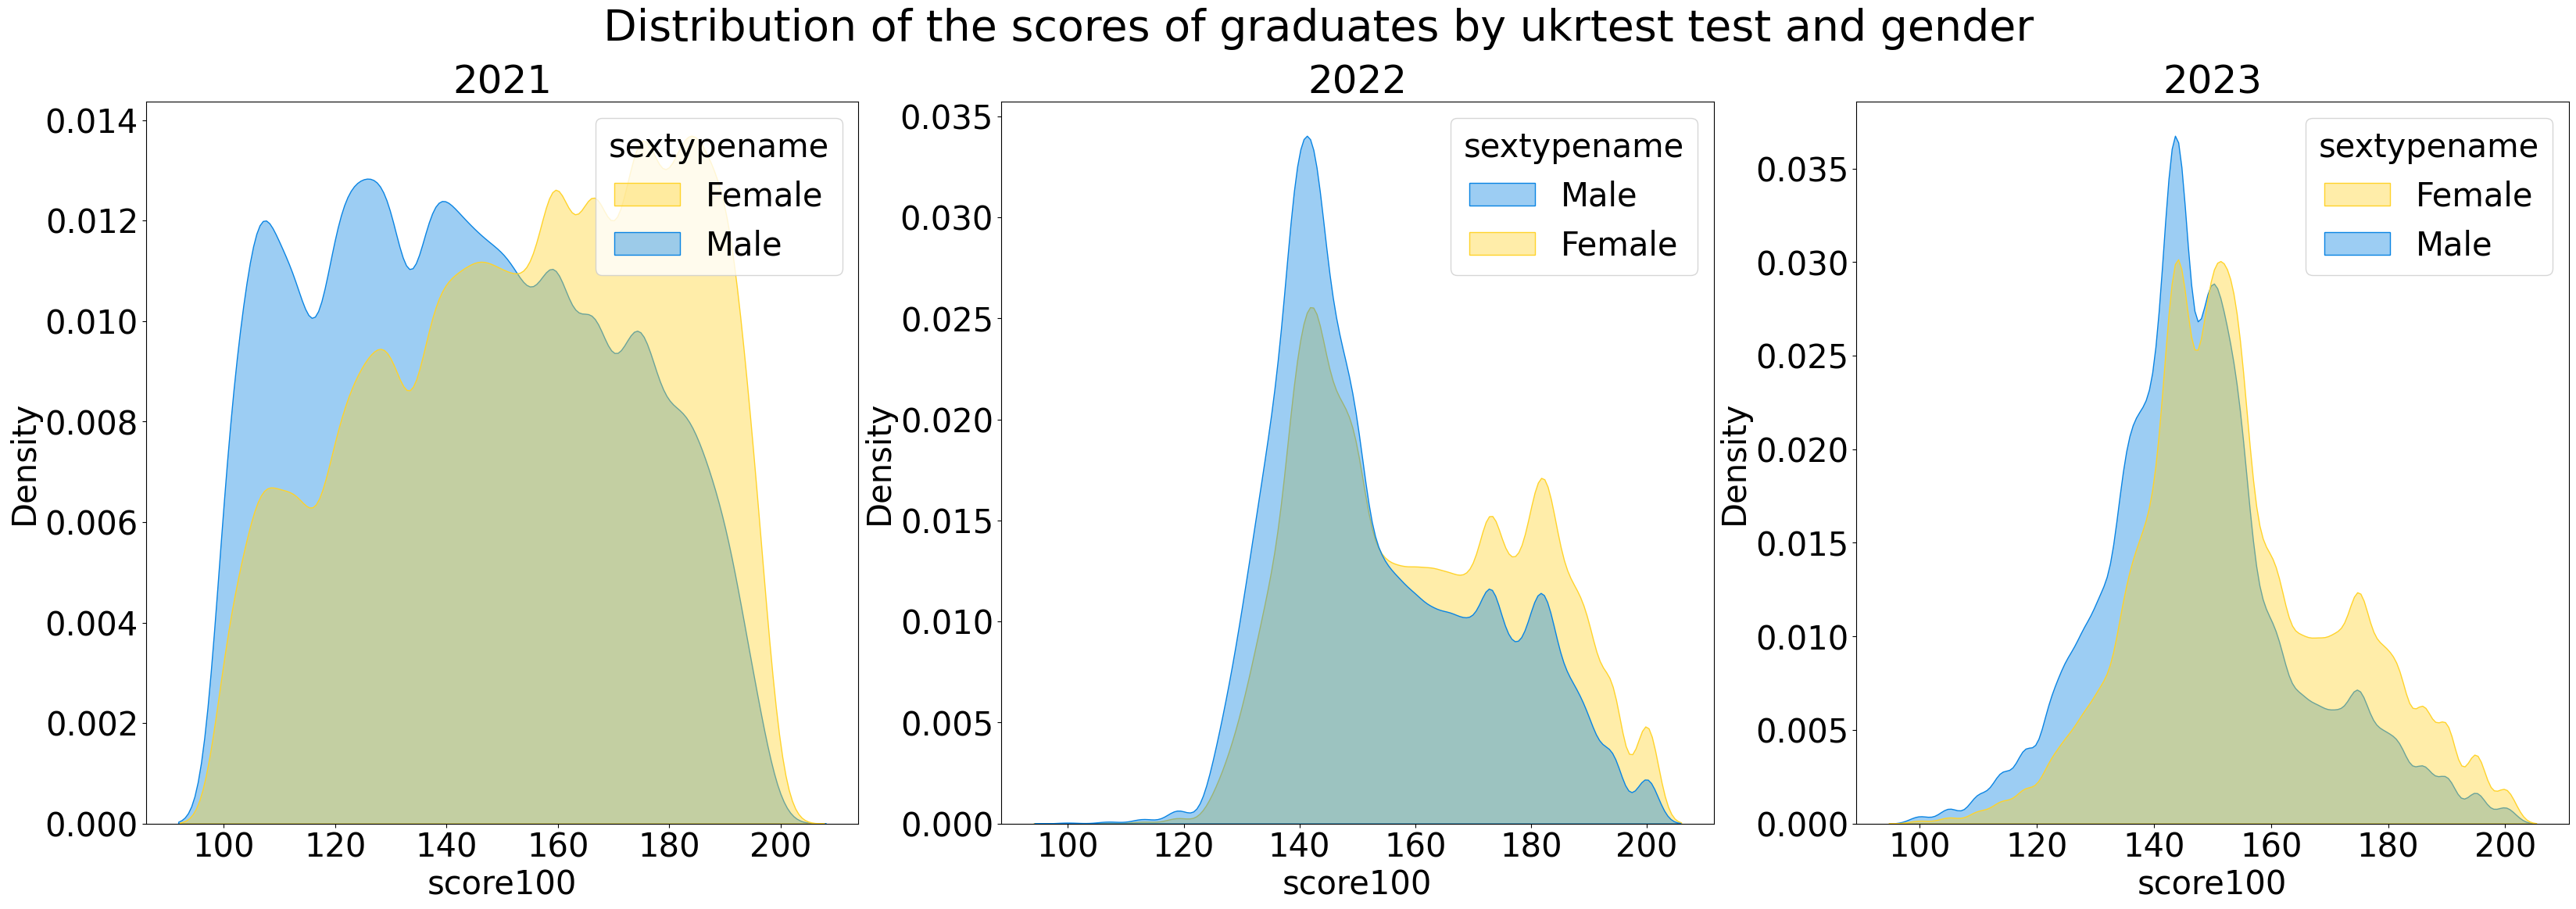

In [29]:
plt.rcParams['font.size'] = 30
sns.set_palette(['#ffd32a','#0984e3'])
subject = 'ukrtest'
years = [2021, 2022, 2023]

# Define a color palette as a dictionary
color_palette = {'Male': '#0984e3', 'Female': '#ffd32a'}

fig, axs = plt.subplots(ncols=3, figsize=(40, 12))

for i, year in enumerate(years):
    sns.kdeplot(
        data=df_graduated_tests[(df_graduated_tests.test_subject == subject) & 
                                (df_graduated_tests.test_status == 'Accepted') & 
                                (df_graduated_tests.year == year)], 
        x="score100", 
        hue="sextypename", 
        fill=True, 
        common_norm=False, 
        alpha=0.4, 
        ax=axs[i],
        palette=color_palette  # Use the explicitly defined color palette
    )
    axs[i].set_title(f'{year}')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=40)
plt.show()


/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11

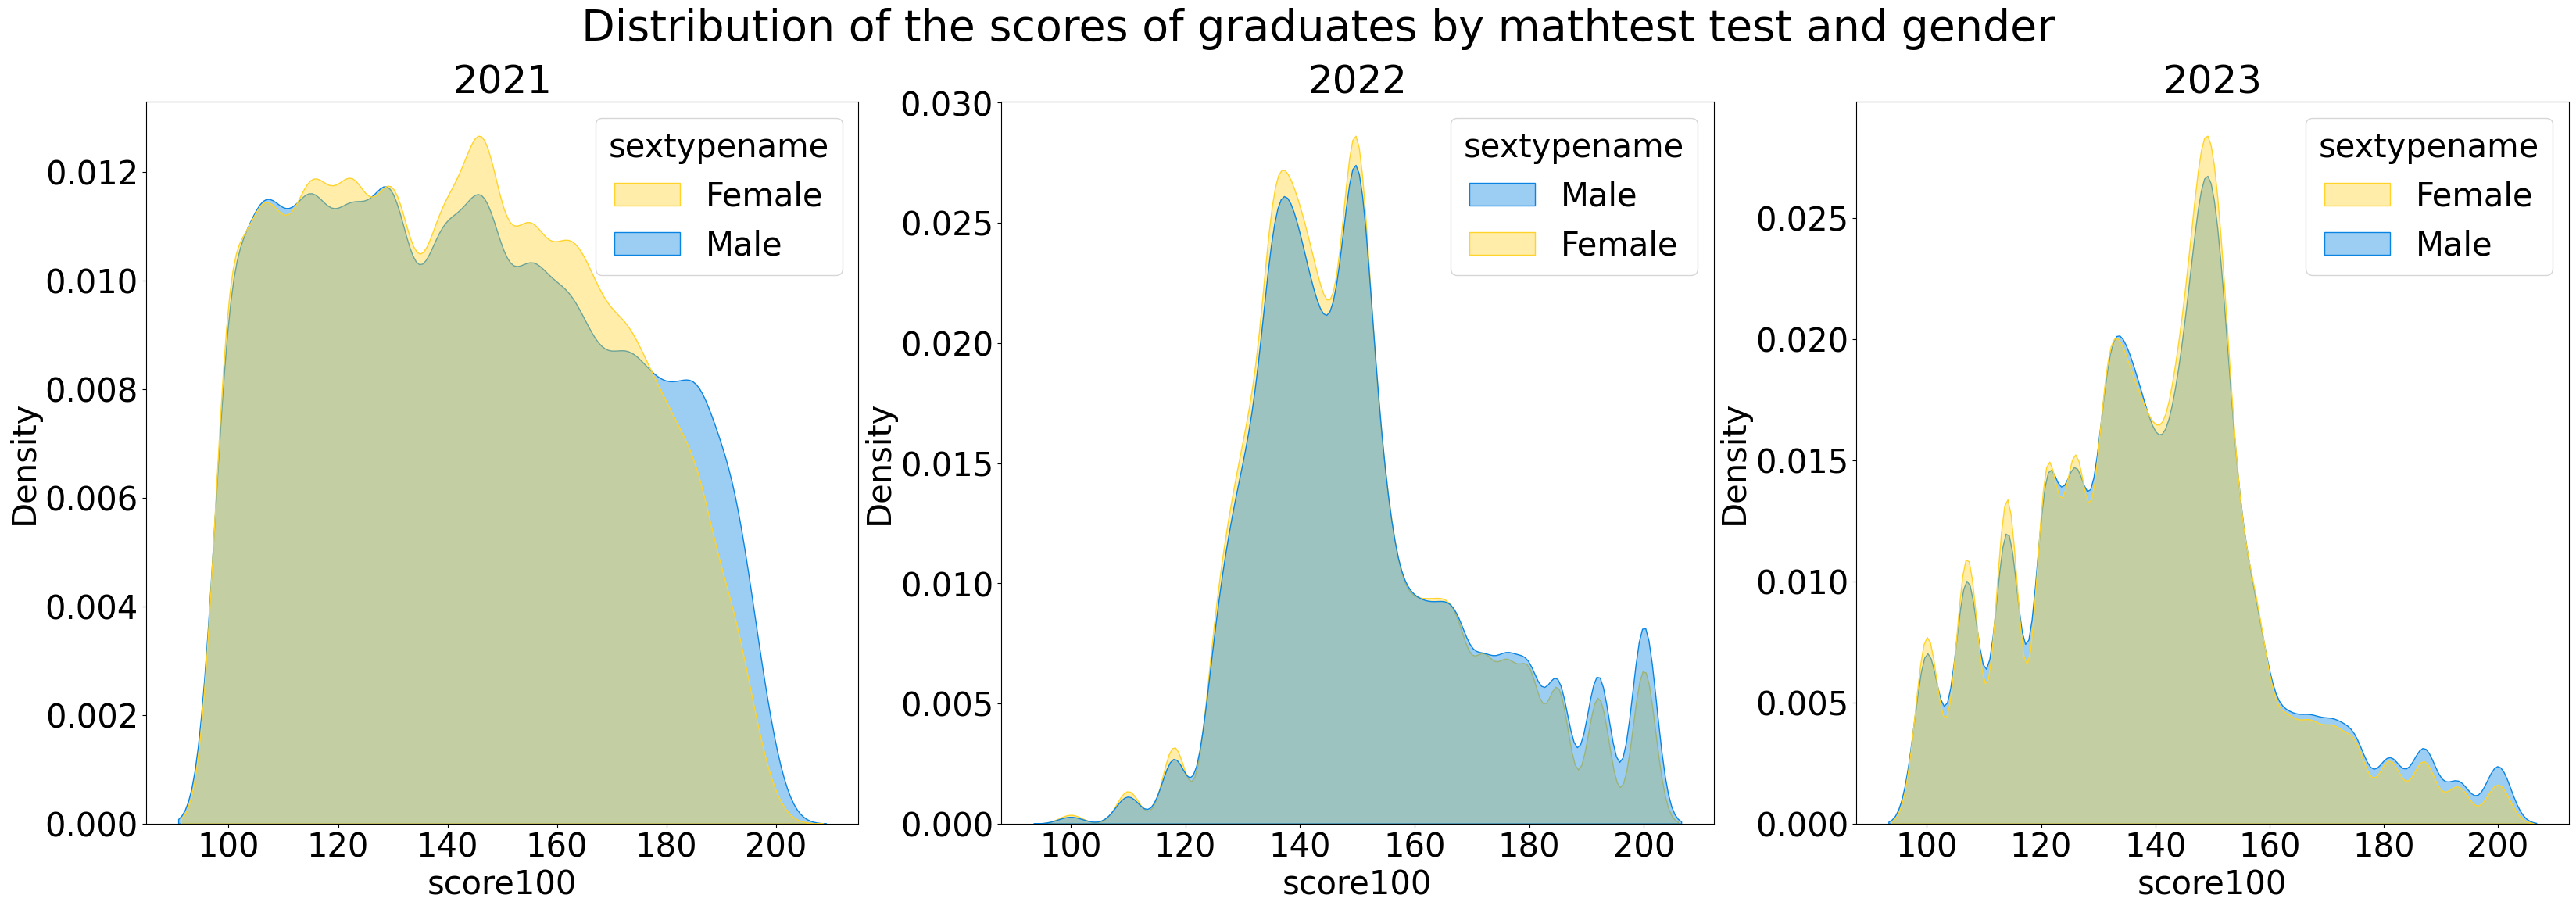

In [30]:

sns.set_palette(['#ffd32a','#0984e3'])
subject = 'mathtest'
years = [2021, 2022, 2023]

# Define a color palette as a dictionary
color_palette = {'Male': '#0984e3', 'Female': '#ffd32a'}

fig, axs = plt.subplots(ncols=3, figsize=(40, 12))

for i, year in enumerate(years):
    sns.kdeplot(
        data=df_graduated_tests[(df_graduated_tests.test_subject == subject) & 
                                (df_graduated_tests.test_status == 'Accepted') & 
                                (df_graduated_tests.year == year)], 
        x="score100", 
        hue="sextypename", 
        fill=True, 
        common_norm=False, 
        alpha=0.4, 
        ax=axs[i],
        palette=color_palette  # Use the explicitly defined color palette
    )
    axs[i].set_title(f'{year}')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=40)
plt.show()


/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11

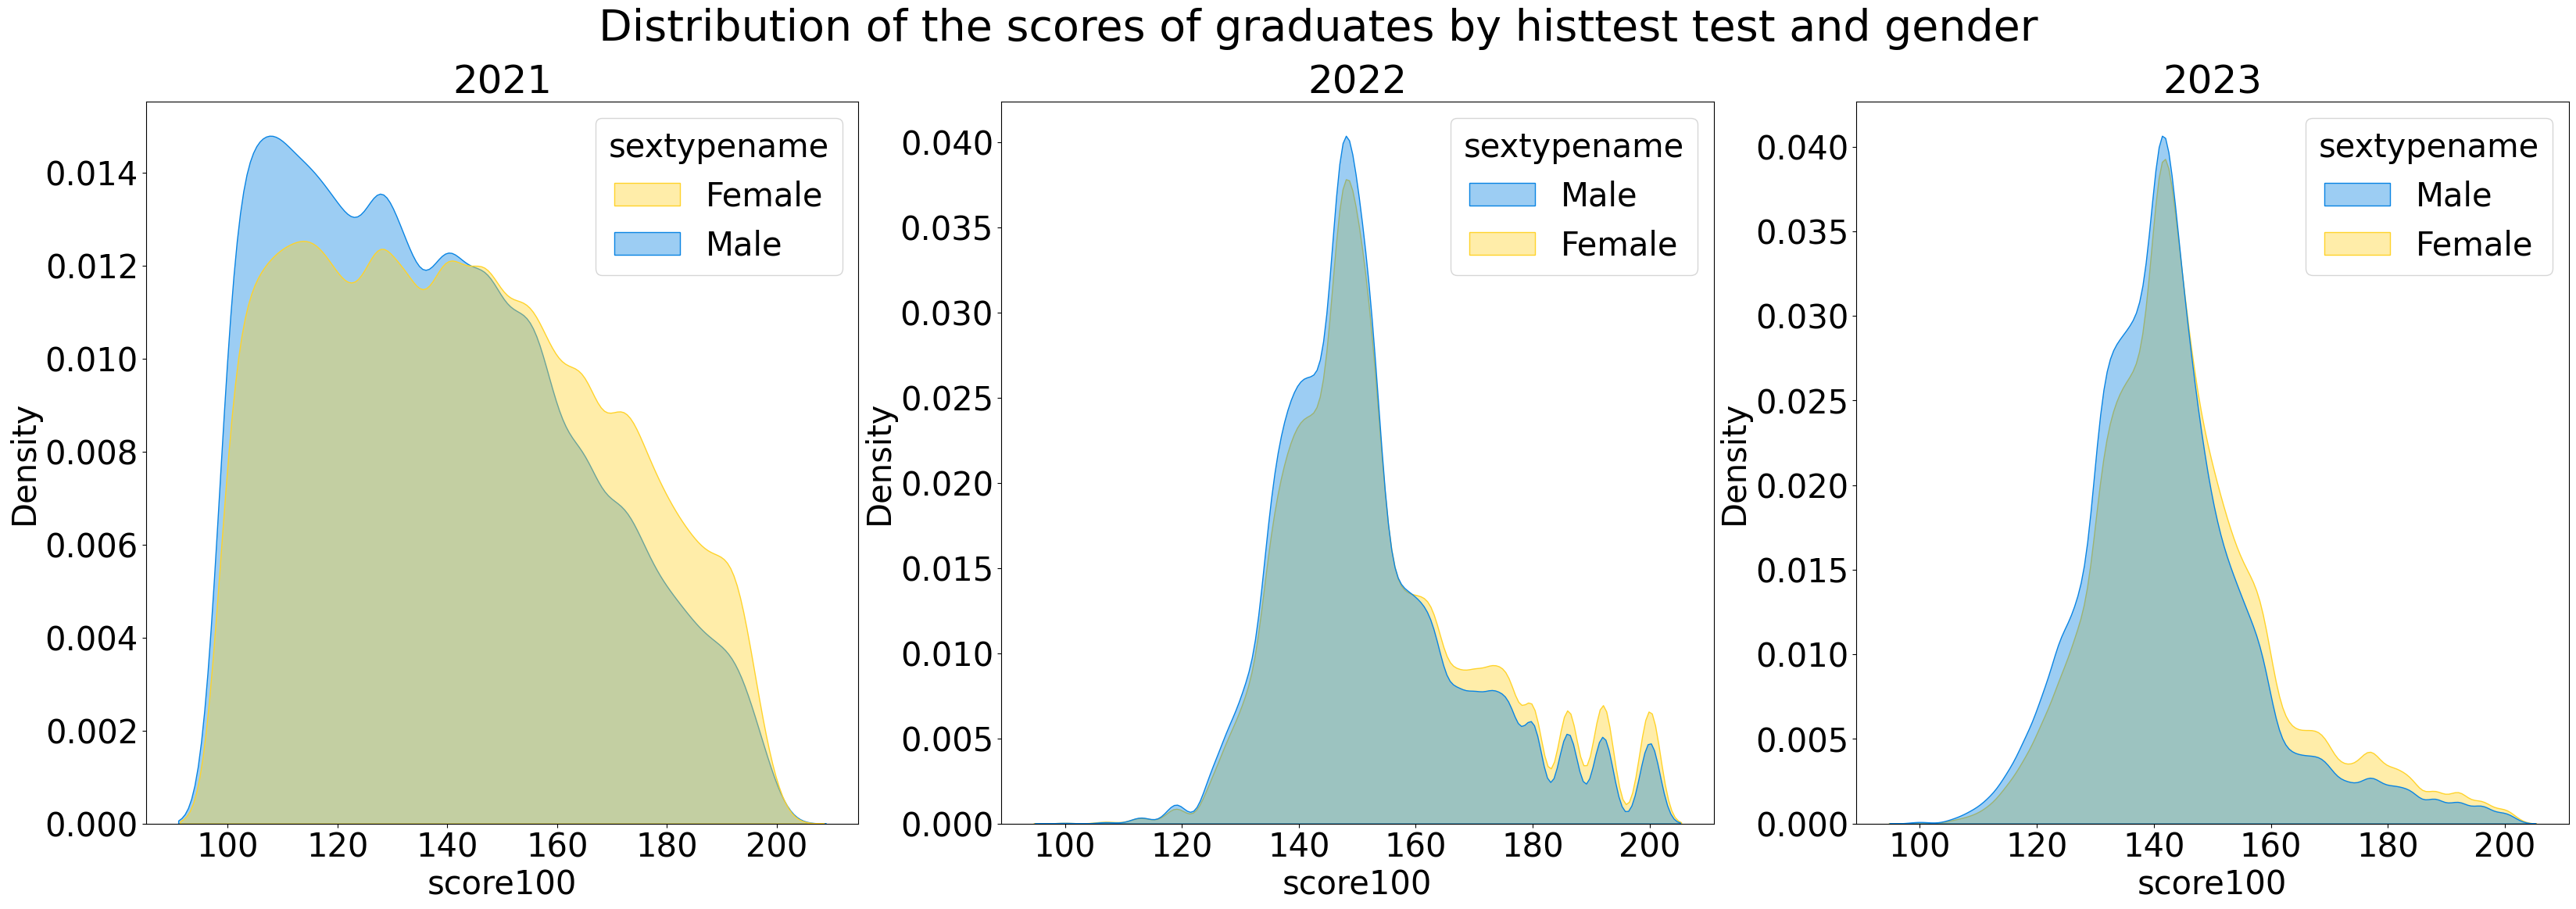

In [31]:

sns.set_palette(['#ffd32a','#0984e3'])
subject = 'histtest'
years = [2021, 2022, 2023]

# Define a color palette as a dictionary
color_palette = {'Male': '#0984e3', 'Female': '#ffd32a'}

fig, axs = plt.subplots(ncols=3, figsize=(40, 12))

for i, year in enumerate(years):
    sns.kdeplot(
        data=df_graduated_tests[(df_graduated_tests.test_subject == subject) & 
                                (df_graduated_tests.test_status == 'Accepted') & 
                                (df_graduated_tests.year == year)], 
        x="score100", 
        hue="sextypename", 
        fill=True, 
        common_norm=False, 
        alpha=0.4, 
        ax=axs[i],
        palette=color_palette  # Use the explicitly defined color palette
    )
    axs[i].set_title(f'{year}')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=40)
plt.show()


/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11

Text(0.5, 0.98, 'Distribution of the scores of graduates by histtest test and gender')

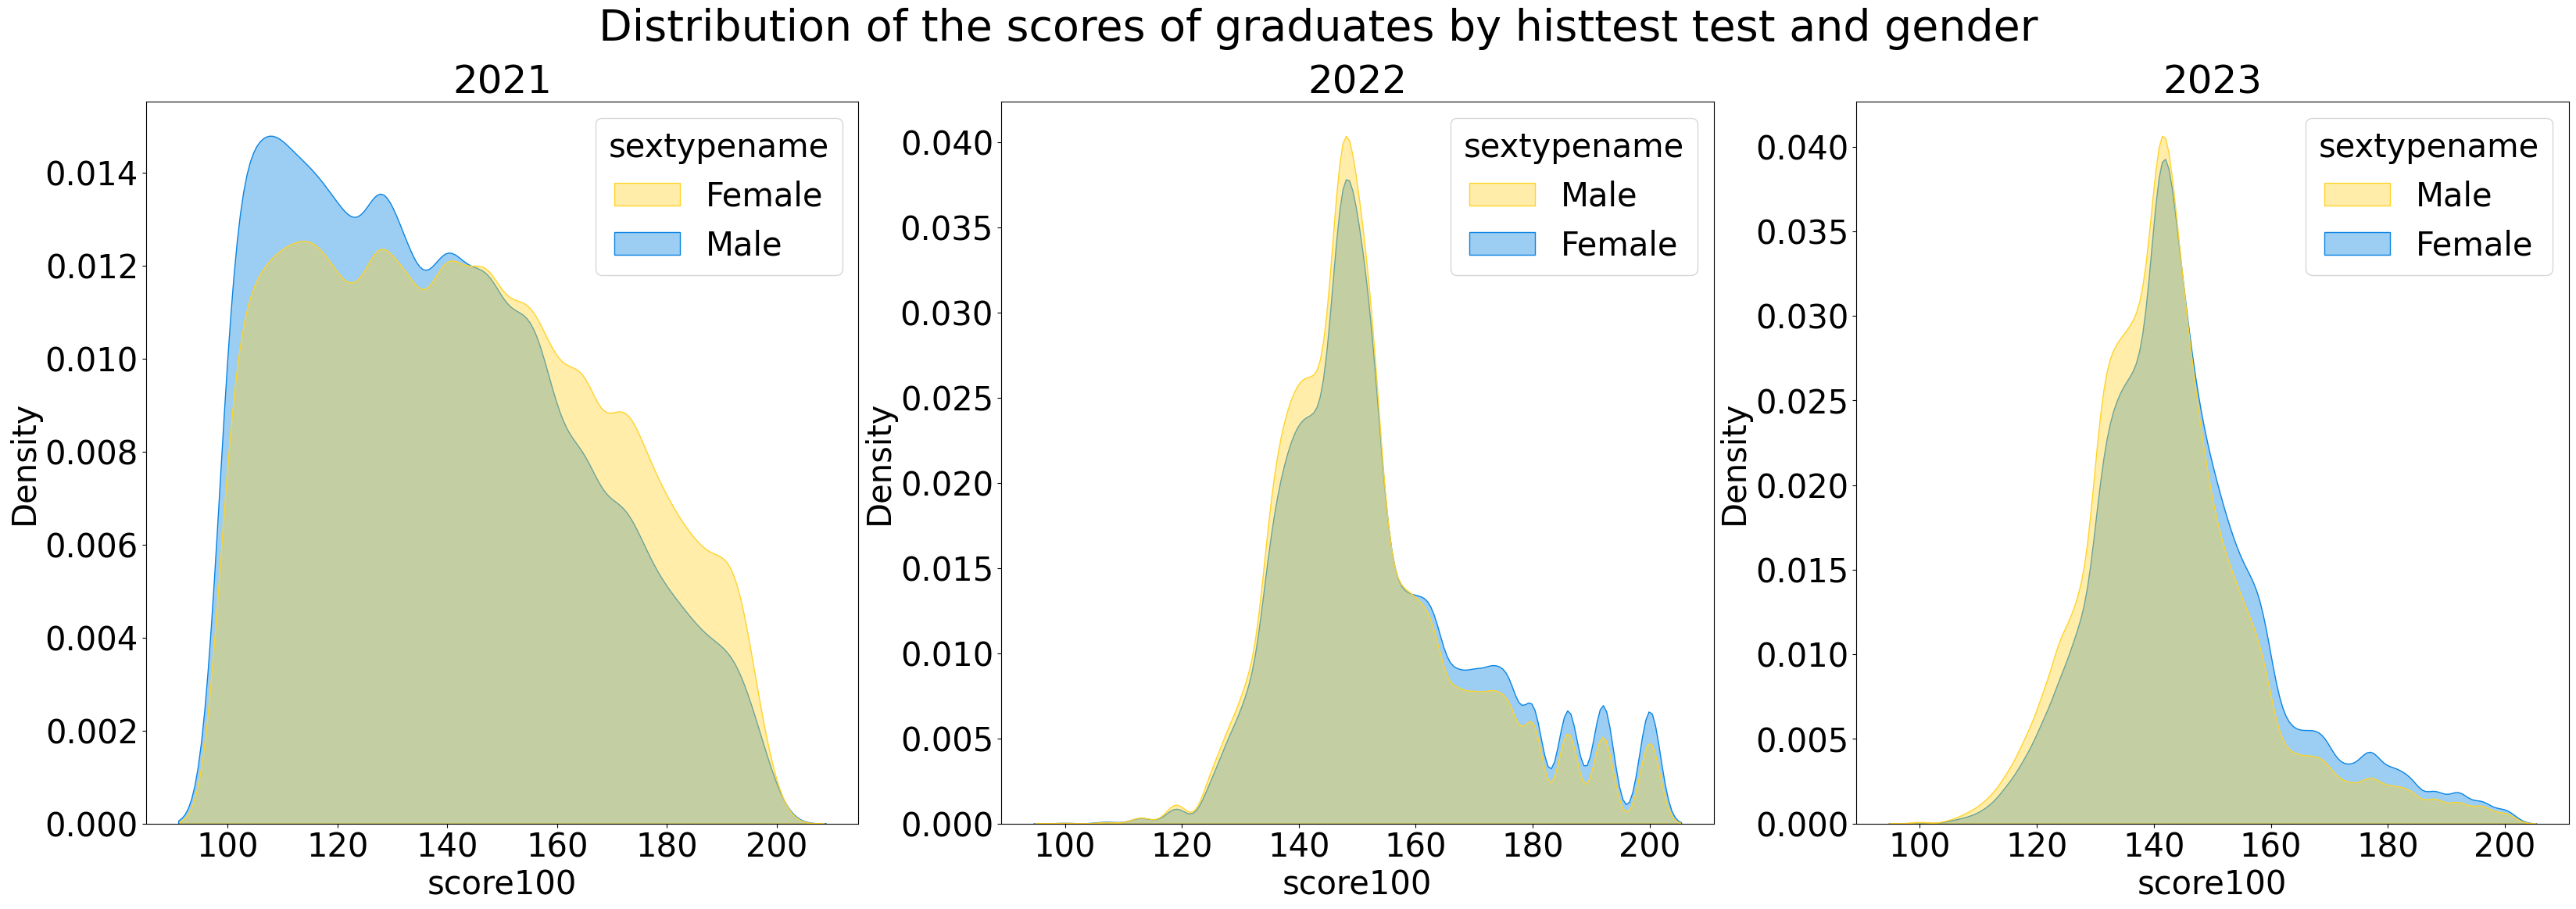

In [32]:
subject = 'histtest'
years = [2021, 2022, 2023]

fig, axs = plt.subplots(ncols=3,figsize=(40, 12))

for i, year in enumerate(years):
    sns.kdeplot(data=df_graduated_tests[(df_graduated_tests.test_subject==subject)&(df_graduated_tests.test_status=='Accepted')&(df_graduated_tests.year==year)], x="score100", hue="sextypename", fill=True, common_norm=False, alpha=0.4, ax=axs[i])
    axs[i].set_title(f'{year}')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=40)

/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11

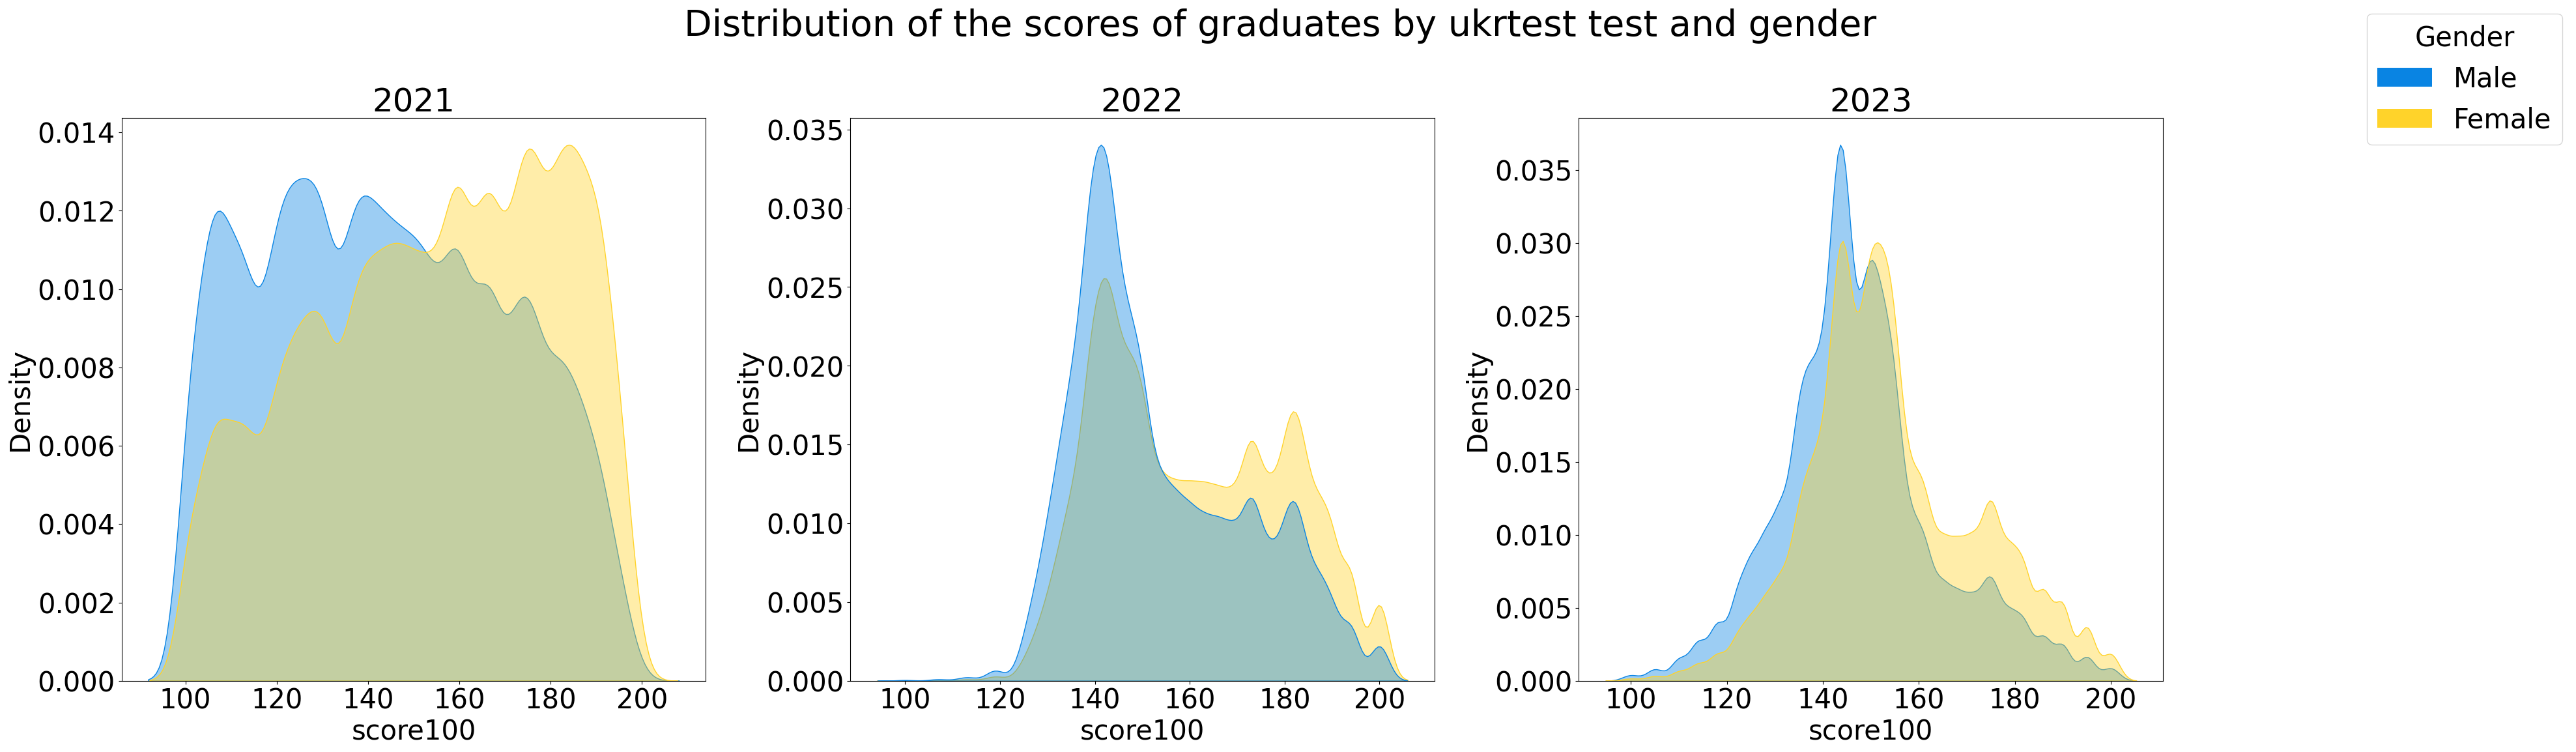

In [33]:

# Assuming df_graduated_tests is your DataFrame

sns.set_palette(['#ffd32a','#0984e3'])
subject = 'ukrtest'
years = [2021, 2022, 2023]

# Define your color palette as a dictionary for consistent color assignment
color_palette = {'Male': '#0984e3', 'Female': '#ffd32a'}  # Adjust keys as per your dataframe

fig, axs = plt.subplots(ncols=3, figsize=(40, 12))  # Adjusted for potential legend space

for i, year in enumerate(years):
    sns.kdeplot(
        data=df_graduated_tests[(df_graduated_tests.test_subject == subject) & 
                                (df_graduated_tests.test_status == 'Accepted') & 
                                (df_graduated_tests.year == year)], 
        x="score100", 
        hue="sextypename", 
        fill=True, 
        common_norm=False, 
        alpha=0.4, 
        ax=axs[i],
        palette=color_palette,  # Use the explicitly defined color palette
        legend=False  # Suppress individual legends
    )
    axs[i].set_title(f'{year}')

# Manually creating legend entries
from matplotlib.patches import Patch
legend_handles = [Patch(facecolor=color_palette['Male'], label='Male'),
                  Patch(facecolor=color_palette['Female'], label='Female')]

# Adding a unified legend to the figure
# You may need to adjust bbox_to_anchor values depending on your figure layout
fig.legend(handles=legend_handles, loc='upper right', title='Gender')

plt.suptitle(f'Distribution of the scores of graduates by {subject} test and gender', fontsize=40)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()


# Ukrainian

In [34]:
df_ukr_graduated = df_graduated_tests[df_graduated_tests.test_subject == 'ukrtest']
sum(df_ukr_graduated.duplicated())

0

In [35]:
df_ukr_graduated

outid  year  score100  score12  score  \
0        00000AC7-CDDE-4C77-B979-8B0351AF1305  2017     161.0      9.0    NaN   
2        0000268f-9fdd-49b2-9ee2-422778c9c4f1  2016     160.0      8.0    NaN   
3        0000324e-f525-49c4-a963-8df0cc02d6d5  2018     166.0      9.0   69.0   
7        00003fa1-de6c-488e-a130-8acf4fb817ef  2019     167.0      7.0   69.0   
10       000051f8-9476-49b5-83c2-4797a201b706  2021     167.0      NaN   51.0   
...                                       ...   ...       ...      ...    ...   
2193952  ffff8e58-5322-4b21-a385-d1fee504c2a8  2021     102.0      NaN   18.0   
2193957  ffffb2e5-b2a1-4f51-871b-d281c20e72e8  2019     119.0      4.0   33.0   
2193958  ffffb656-a973-409c-92a8-5d1276874724  2019     137.0      6.0   44.0   
2193961  ffffd378-2c03-407d-8937-3a4acca43f94  2019     127.0      6.0   38.0   
2193963  ffffeeb2-7258-4465-bca3-88dd19902340  2019     169.0     10.0   70.0   

        test_status test_subject test_type KATOTTG_2023_test_center  \
0          Accepted      ukrtest       EIE      UA51100270010275193   
2          Accepted      ukrtest       EIE      UA63120270010216514   
3          Accepted      ukrtest       EIE      UA46100230010074173   
7          Accepted      ukrtest       EIE      UA59080270010287243   
10         Accepted      ukrtest       EIE      UA46120090010078401   
...             ...          ...       ...                      ...   
2193952    Accepted      ukrtest       EIE      UA51040010010048834   
2193957    Accepted      ukrtest       EIE      UA32080090010037585   
2193958    Accepted      ukrtest       EIE      UA18060170010010060   
2193961    Accepted      ukrtest       EIE      UA53020030010087471   
2193963    Accepted      ukrtest       EIE      UA12020010010639502   

        EDRPOU_test_center sextypename EDRPOU_school  \
0                 20995060      Female      23864660   
2                 24486622        Male      23320374   
3                 34387362        Male      20773804   
7                 00220078      Female      21117479   
10                22375166      Female      22375255   
...                    ...         ...           ...   
2193952           25417126        Male      25417118   
2193957           26078206        Male      25667248   
2193958           06670569      Female      06670782   
2193961           21064435      Female      25173440   
2193963           26508368        Male      26509416   

                                                    status  age  \
0        A graduate of an Ukrainian school of the curre...   17   
2        A graduate of an Ukrainian school of the curre...   18   
3        A graduate of an Ukrainian school of the curre...   17   
7        A graduate of an Ukrainian school of the curre...   17   
10       A graduate of an Ukrainian school of the curre...   18   
...                                                    ...  ...   
2193952  A graduate of an Ukrainian school of the curre...   17   
2193957  A graduate of an Ukrainian school of the curre...   17   
2193958  A graduate of an Ukrainian school of the curre...   17   
2193961  A graduate of an Ukrainian school of the curre...   17   
2193963  A graduate of an Ukrainian school of the curre...   17   

                    category      region_name  abroad category_test_center  \
0        districts in cities           Odeska       0  districts in cities   
2        districts in cities       Kharkivska       0  districts in cities   
3                       city          Lvivska       0                 city   
7        districts in cities           Sumska       0  districts in cities   
10                   village          Lvivska       0                 city   
...                      ...              ...     ...                  ...   
2193952                 city           Odeska       0                 city   
2193957              village          Kyivska       0                 city   
2193958              village      

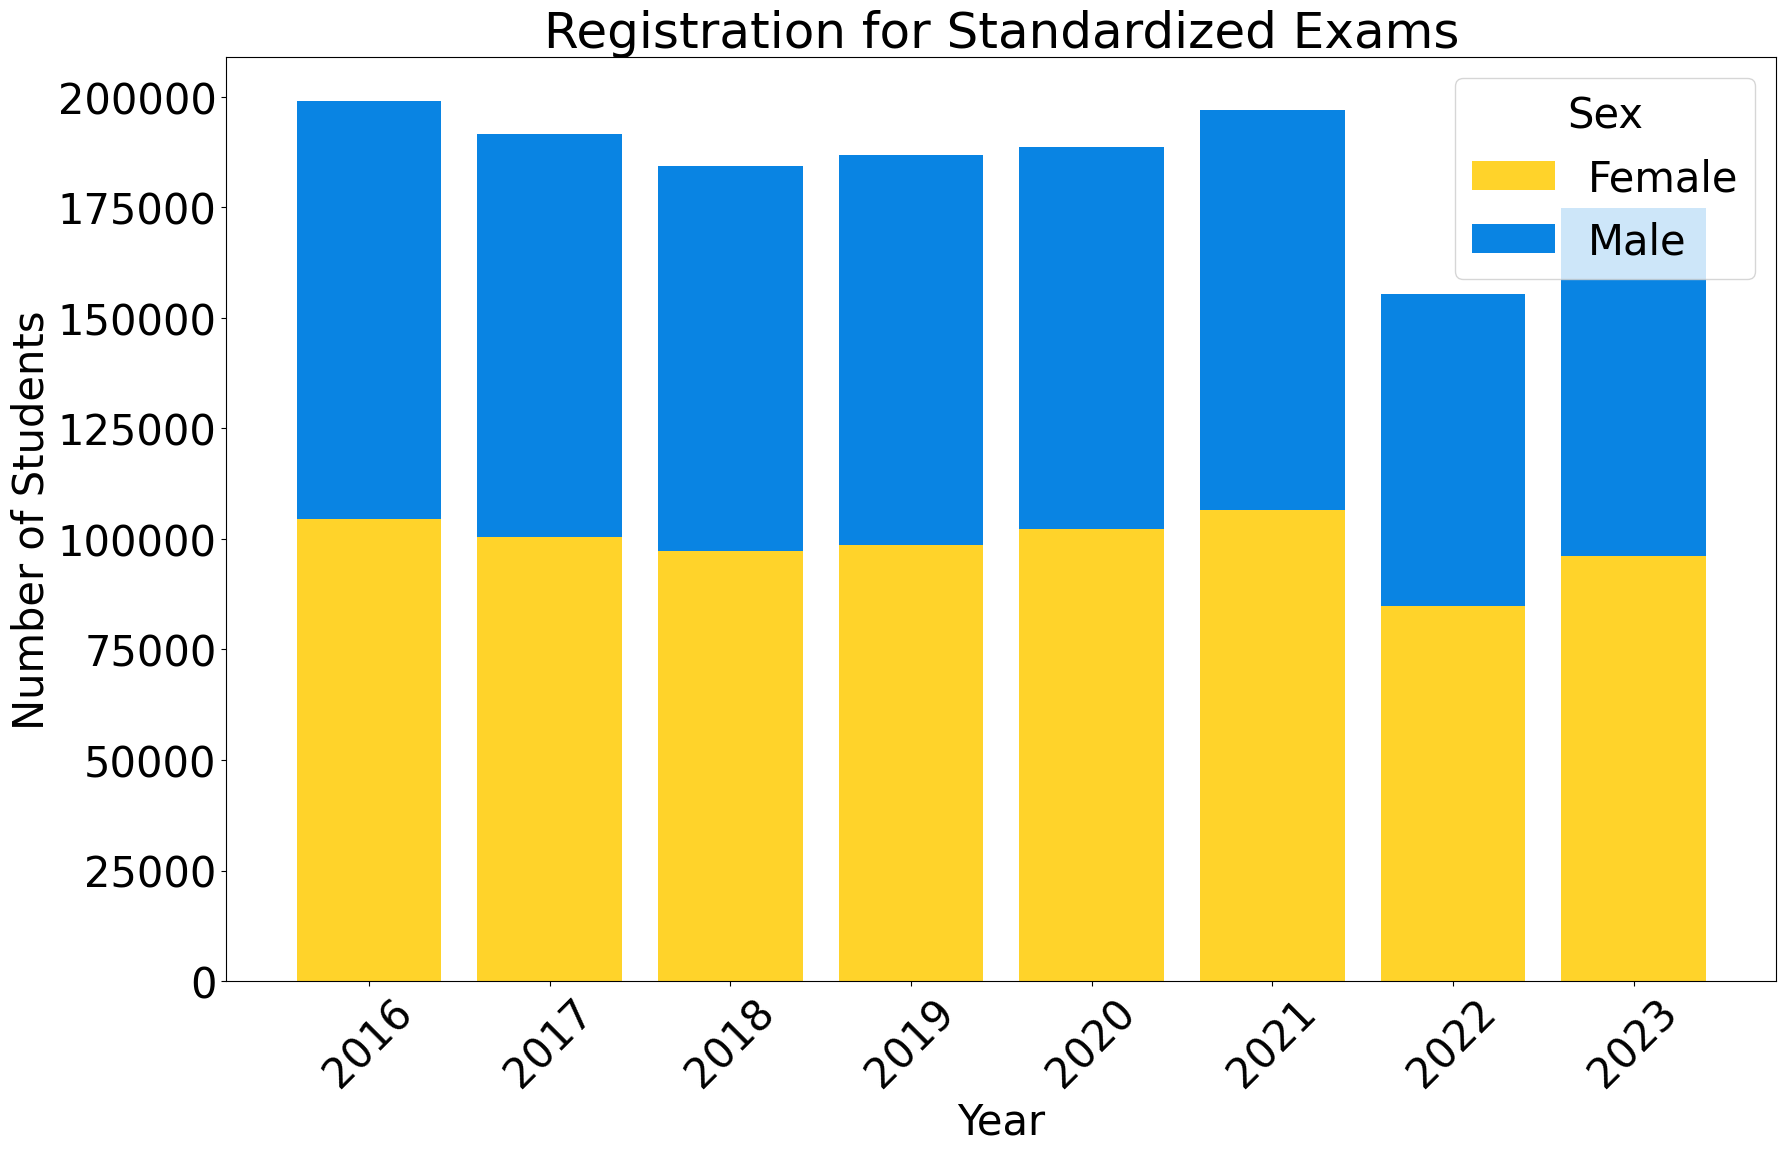

In [36]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated.groupby(['year', 'sextypename']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(20, 12))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for sextype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[sextype], bottom=bottom_pos, label=sextype)
    bottom_pos += df_pivot[sextype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Sex')

plt.show()

Female
Male


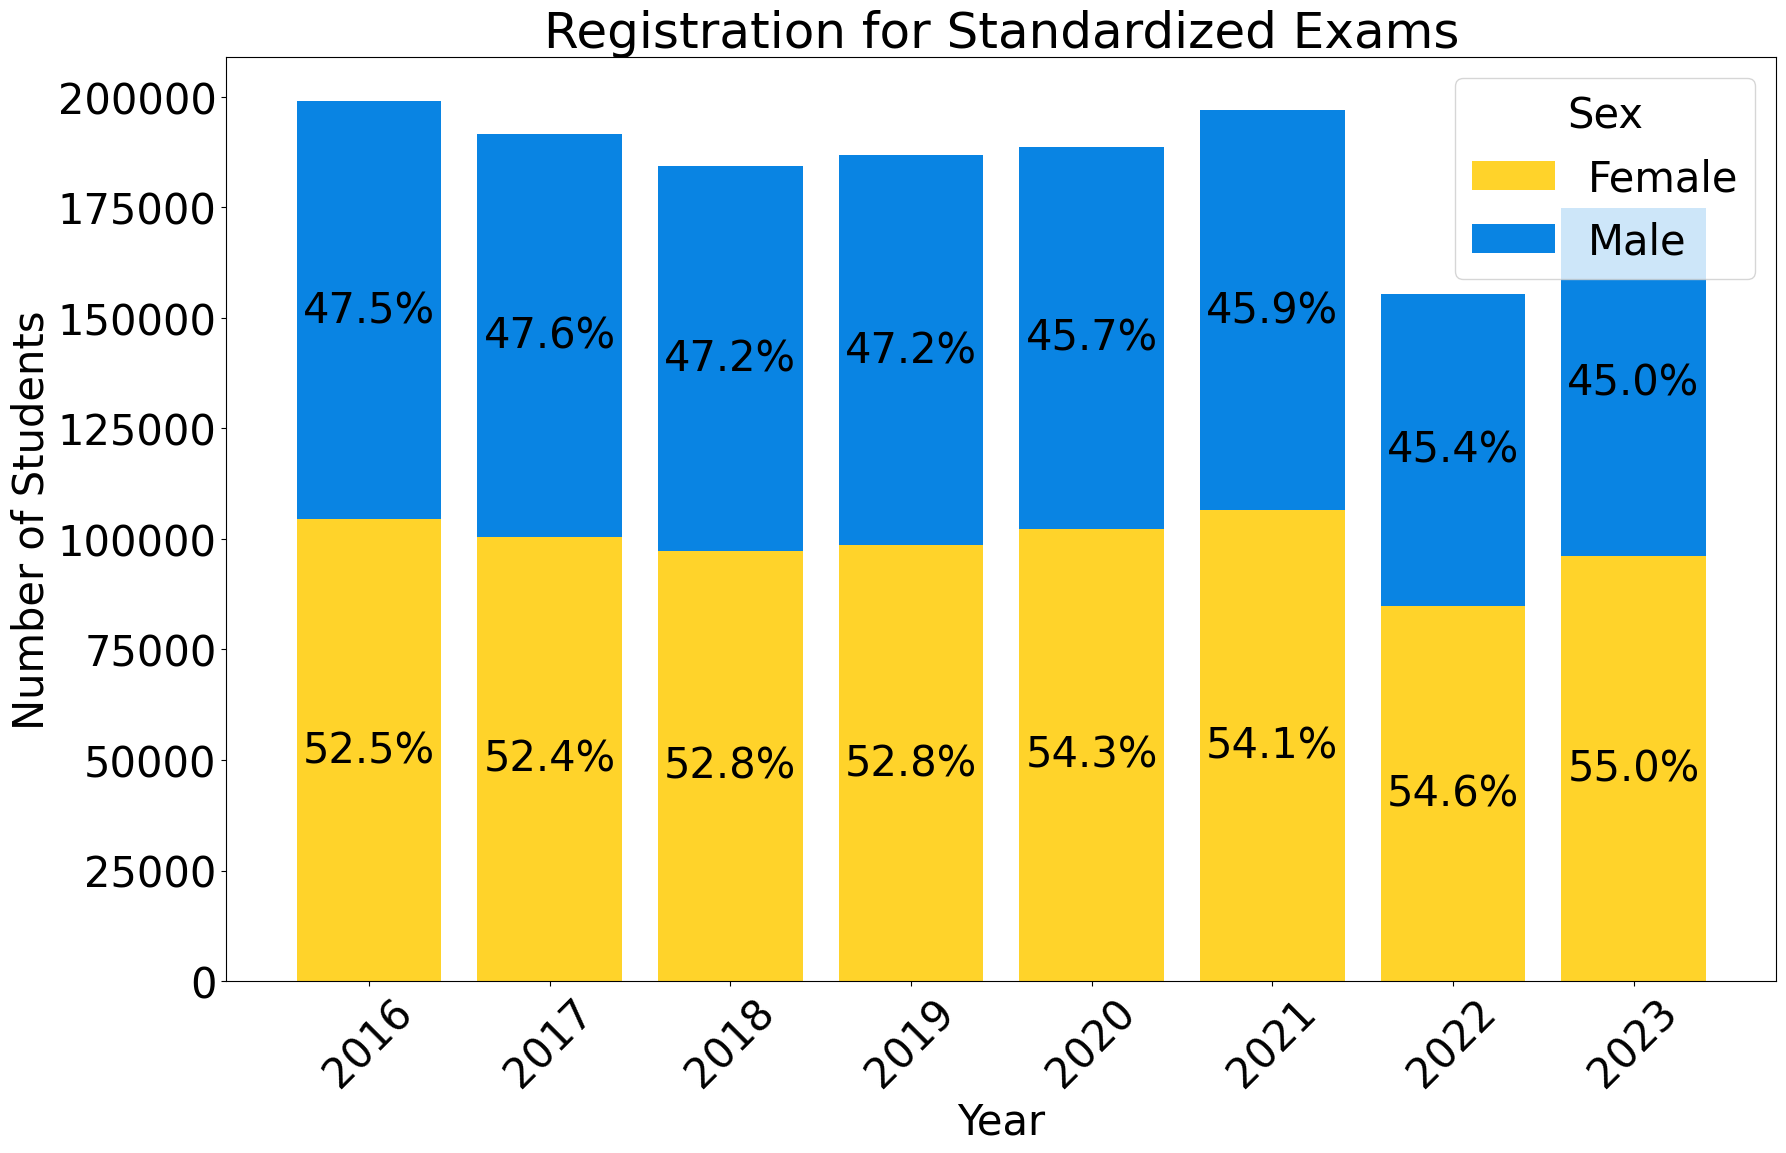

In [37]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated.groupby(['year', 'sextypename']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(20, 12))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for sextype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[sextype], bottom=bottom_pos, label=sextype)
    print(sextype)
    
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[sextype], start=2016):
        percentage = value / (df_pivot['Male'][i] + df_pivot['Female'][i]) * 100

        # print(bottom_pos[i-2016] + (value/2))
        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and sextype=='Female':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[sextype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Sex')

plt.show()

Female
Male


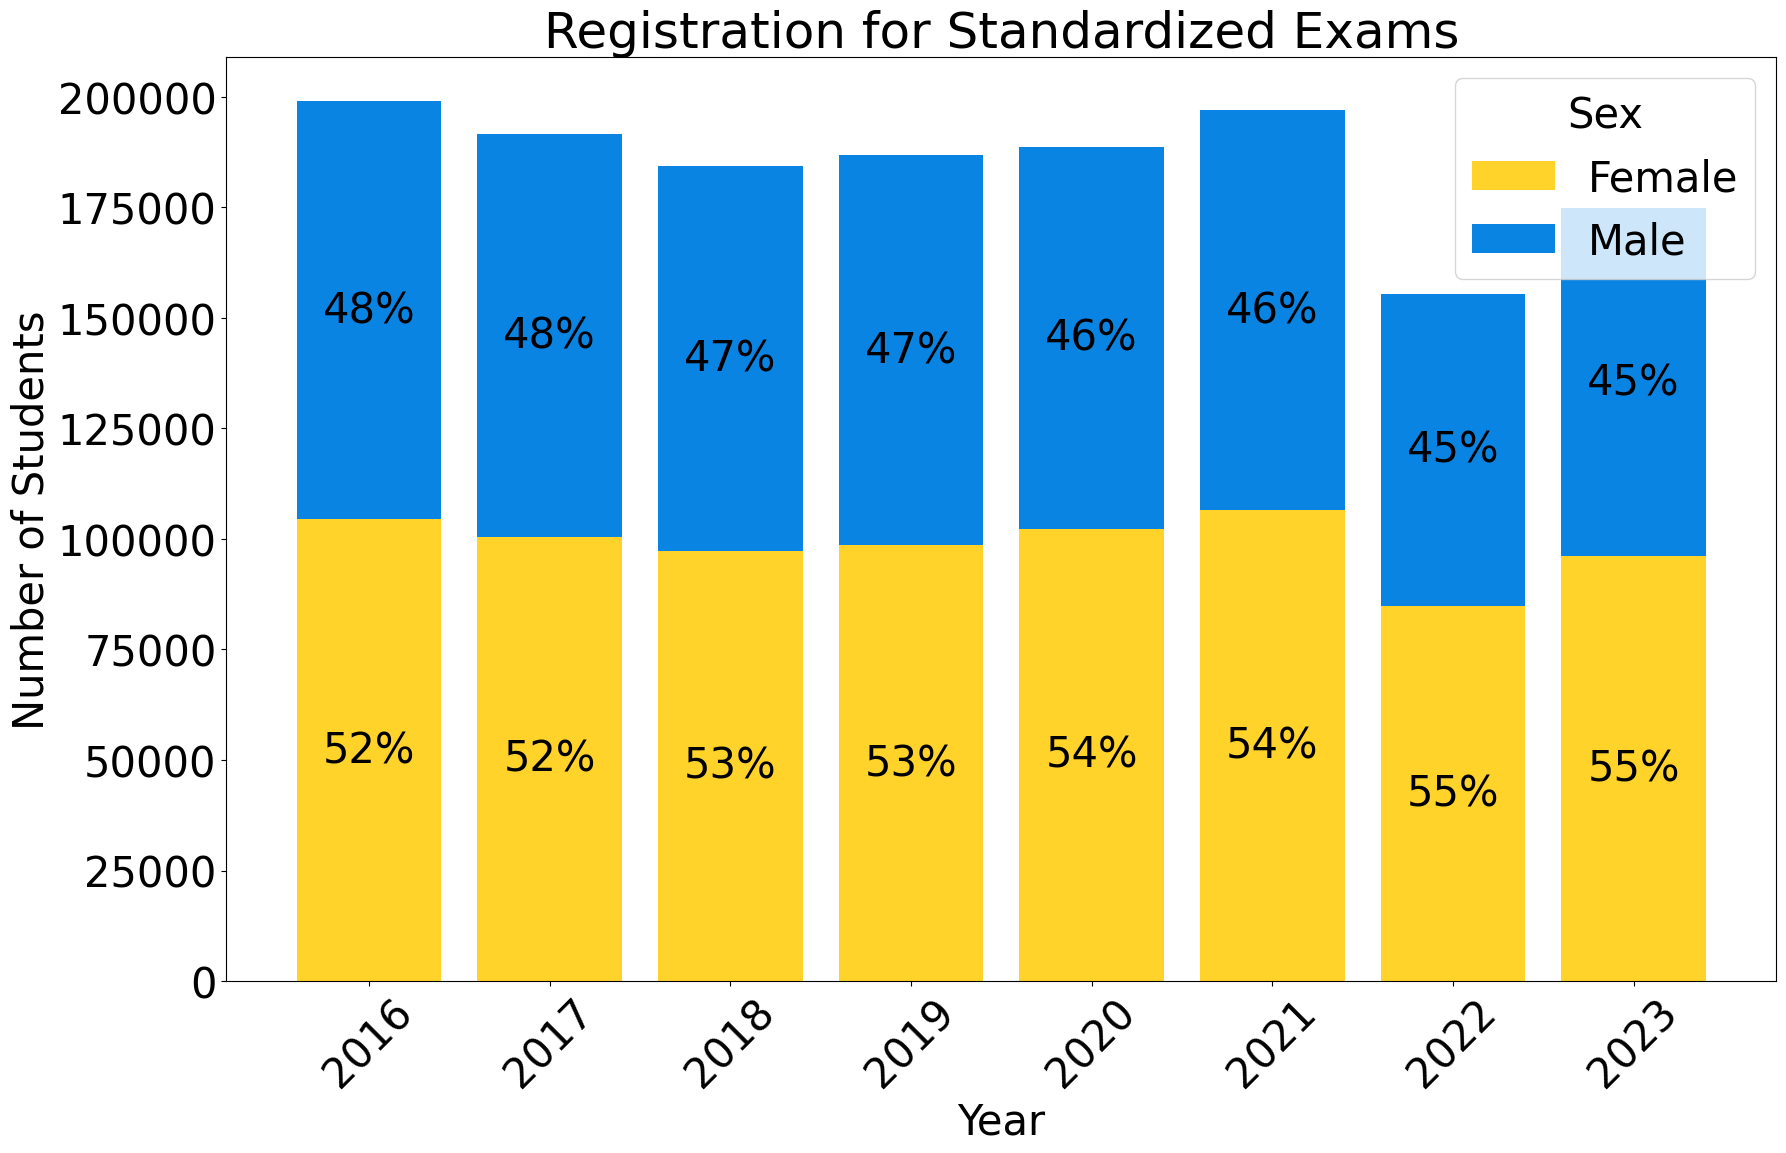

In [38]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated.groupby(['year', 'sextypename']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(20, 12))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for sextype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[sextype], bottom=bottom_pos, label=sextype)
    print(sextype)
    
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[sextype], start=2016):
        percentage = value / (df_pivot['Male'][i] + df_pivot['Female'][i]) * 100

        # print(bottom_pos[i-2016] + (value/2))
        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and sextype=='Female':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[sextype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Sex')

plt.show()

In [39]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'category_test_center',
       'KATOTTG_2023_region_test_center', 'region_name_test_center'],
      dtype='object')

Kyiv and Kyivska oblast

In [40]:
df_ukr_graduated[((df_ukr_graduated.region_name=='Kyiv')&(df_ukr_graduated.region_name_test_center=='Kyivska'))|((df_ukr_graduated.region_name=='Kyivska')&(df_ukr_graduated.region_name_test_center=='Kyiv'))][['year', 'region_name', 'region_name_test_center']].value_counts().head(25)

year  region_name  region_name_test_center
2016  Kyivska      Kyiv                       583
2023  Kyiv         Kyivska                    427
2022  Kyiv         Kyivska                    386
2023  Kyivska      Kyiv                       277
2022  Kyivska      Kyiv                       214
2016  Kyiv         Kyivska                     53
2021  Kyiv         Kyivska                     27
2020  Kyiv         Kyivska                      5
2021  Kyivska      Kyiv                         3
2017  Kyiv         Kyivska                      2
2020  Kyivska      Kyiv                         2
2019  Kyivska      Kyiv                         1
Name: count, dtype: int64

In [41]:
df_ukr_graduated[df_ukr_graduated.region_name.isin(['Kyiv', 'Kyivska'])&df_ukr_graduated.region_name_test_center.isin(['Kyiv', 'Kyivska'])][['year', 'region_name', 'region_name_test_center']].value_counts()

year  region_name  region_name_test_center
2021  Kyiv         Kyiv                       17363
2020  Kyiv         Kyiv                       16070
2019  Kyiv         Kyiv                       14801
2017  Kyiv         Kyiv                       14575
2018  Kyiv         Kyiv                       14456
2016  Kyiv         Kyiv                       13027
2023  Kyiv         Kyiv                       12845
2022  Kyiv         Kyiv                       10609
2021  Kyivska      Kyivska                     9828
2020  Kyivska      Kyivska                     9001
2023  Kyivska      Kyivska                     8413
2016  Kyivska      Kyivska                     8294
2017  Kyivska      Kyivska                     8043
2019  Kyivska      Kyivska                     7889
2018  Kyivska      Kyivska                     7503
2022  Kyivska      Kyivska                     7472
2016  Kyivska      Kyiv                         583
2023  Kyiv         Kyivska                      427
2022  Kyiv         Ky

In [42]:
df_ukr_graduated.category.unique()

array(['districts in cities', 'city', 'village', 'urban village',
       'settlement', 'abroad'], dtype=object)

In [43]:
df_ukr_graduated['location_type'] = df_ukr_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/1016540739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['location_type'] = df_ukr_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [44]:
df_ukr_graduated.location_type.unique()

array(['Urban', 'Rural', 'Abroad'], dtype=object)

In [45]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'category_test_center',
       'KATOTTG_2023_region_test_center', 'region_name_test_center',
       'location_type'],
      dtype='object')

In [46]:
df_pivot

sextypename  Female   Male
year                      
2016         104382  94618
2017         100442  91146
2018          97273  87036
2019          98525  88190
2020         102312  86199
2021         106538  90389
2022          84871  70585
2023          96143  78592

Rural
2016
2017
2018
2019
2020
2021
2022
2023
Urban
2016
2017
2018
2019
2020
2021
2022
2023


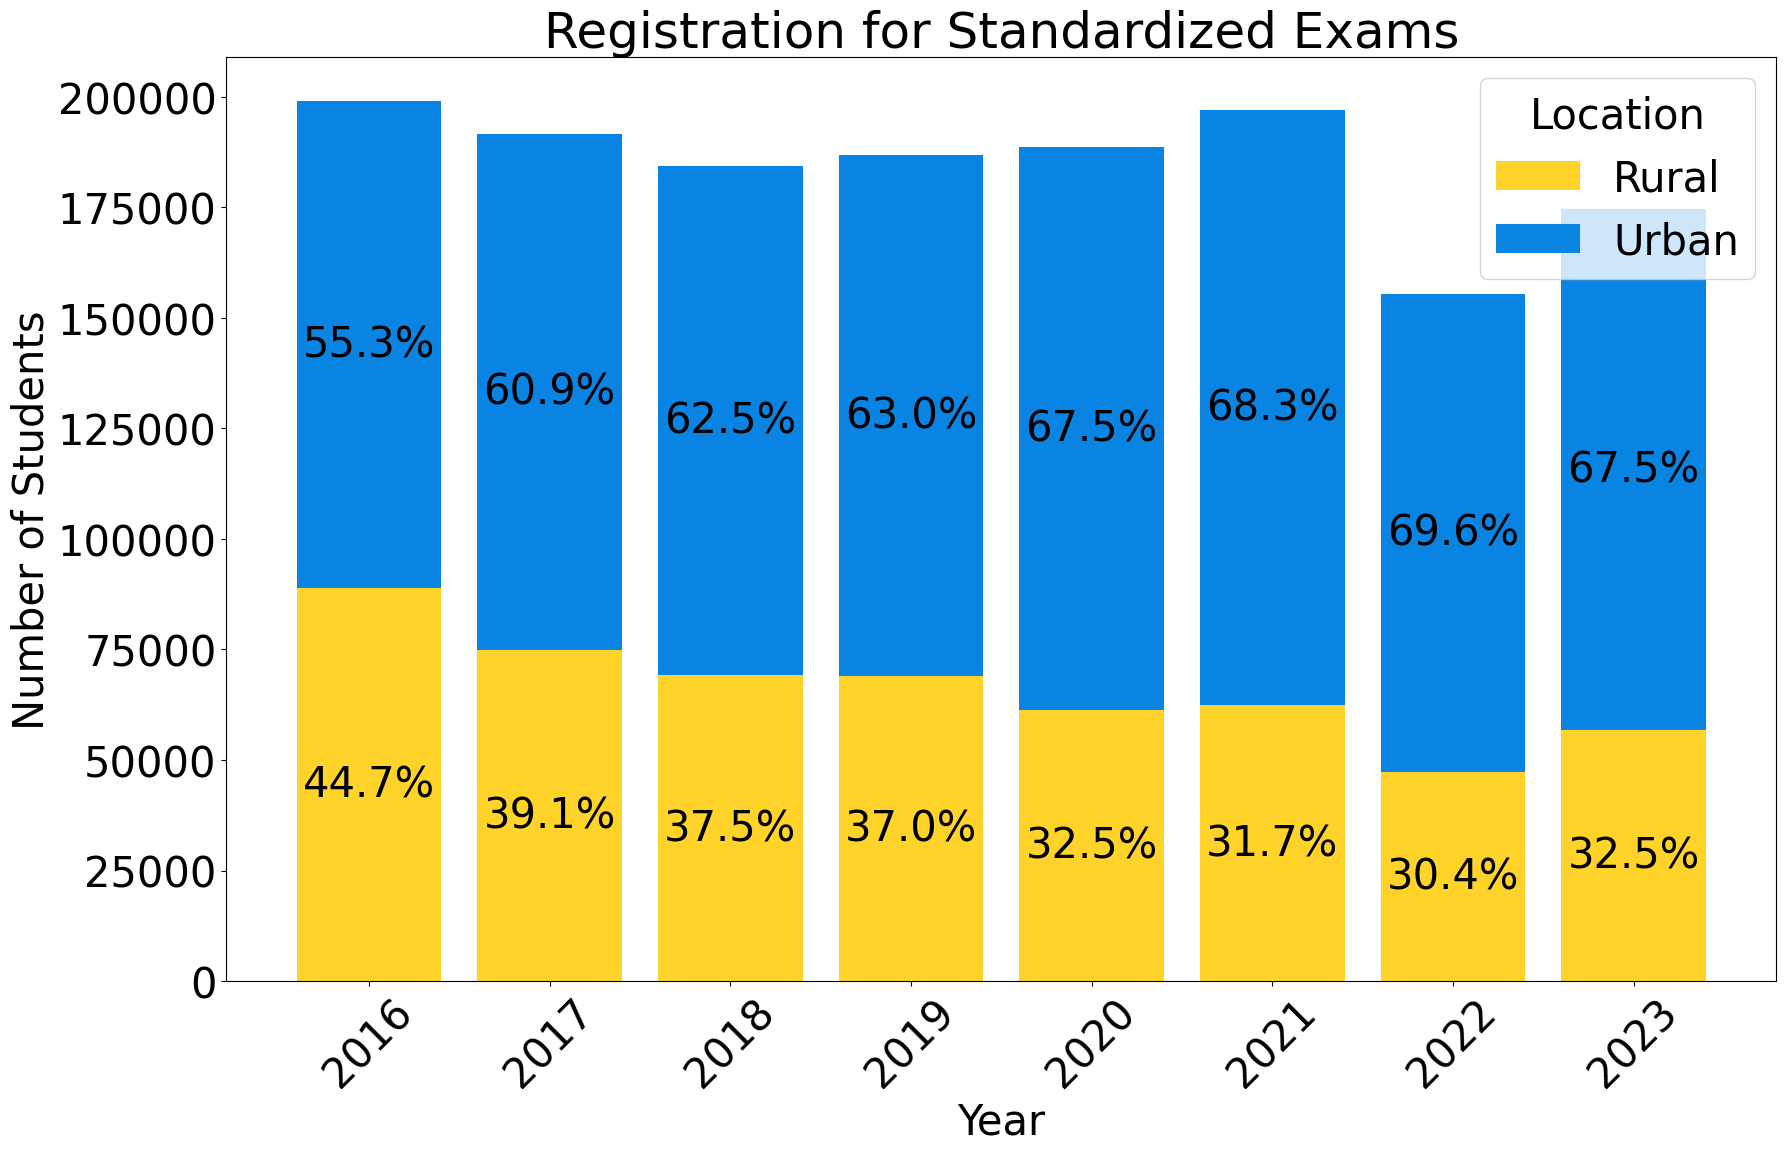

In [47]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated[df_ukr_graduated.location_type!='Abroad'].groupby(['year', 'location_type']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(20, 12))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for loctype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[loctype], bottom=bottom_pos, label=loctype)
    print(loctype)
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[loctype], start=2016):
        percentage = value / (df_pivot['Urban'][i] + df_pivot['Rural'][i]) * 100
        print(df_pivot.index[i-2016])

        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and loctype=='Rural':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[loctype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Location', labels=['Rural', 'Urban'])

plt.show()

Rural
2016
2017
2018
2019
2020
2021
2022
2023
Urban
2016
2017
2018
2019
2020
2021
2022
2023


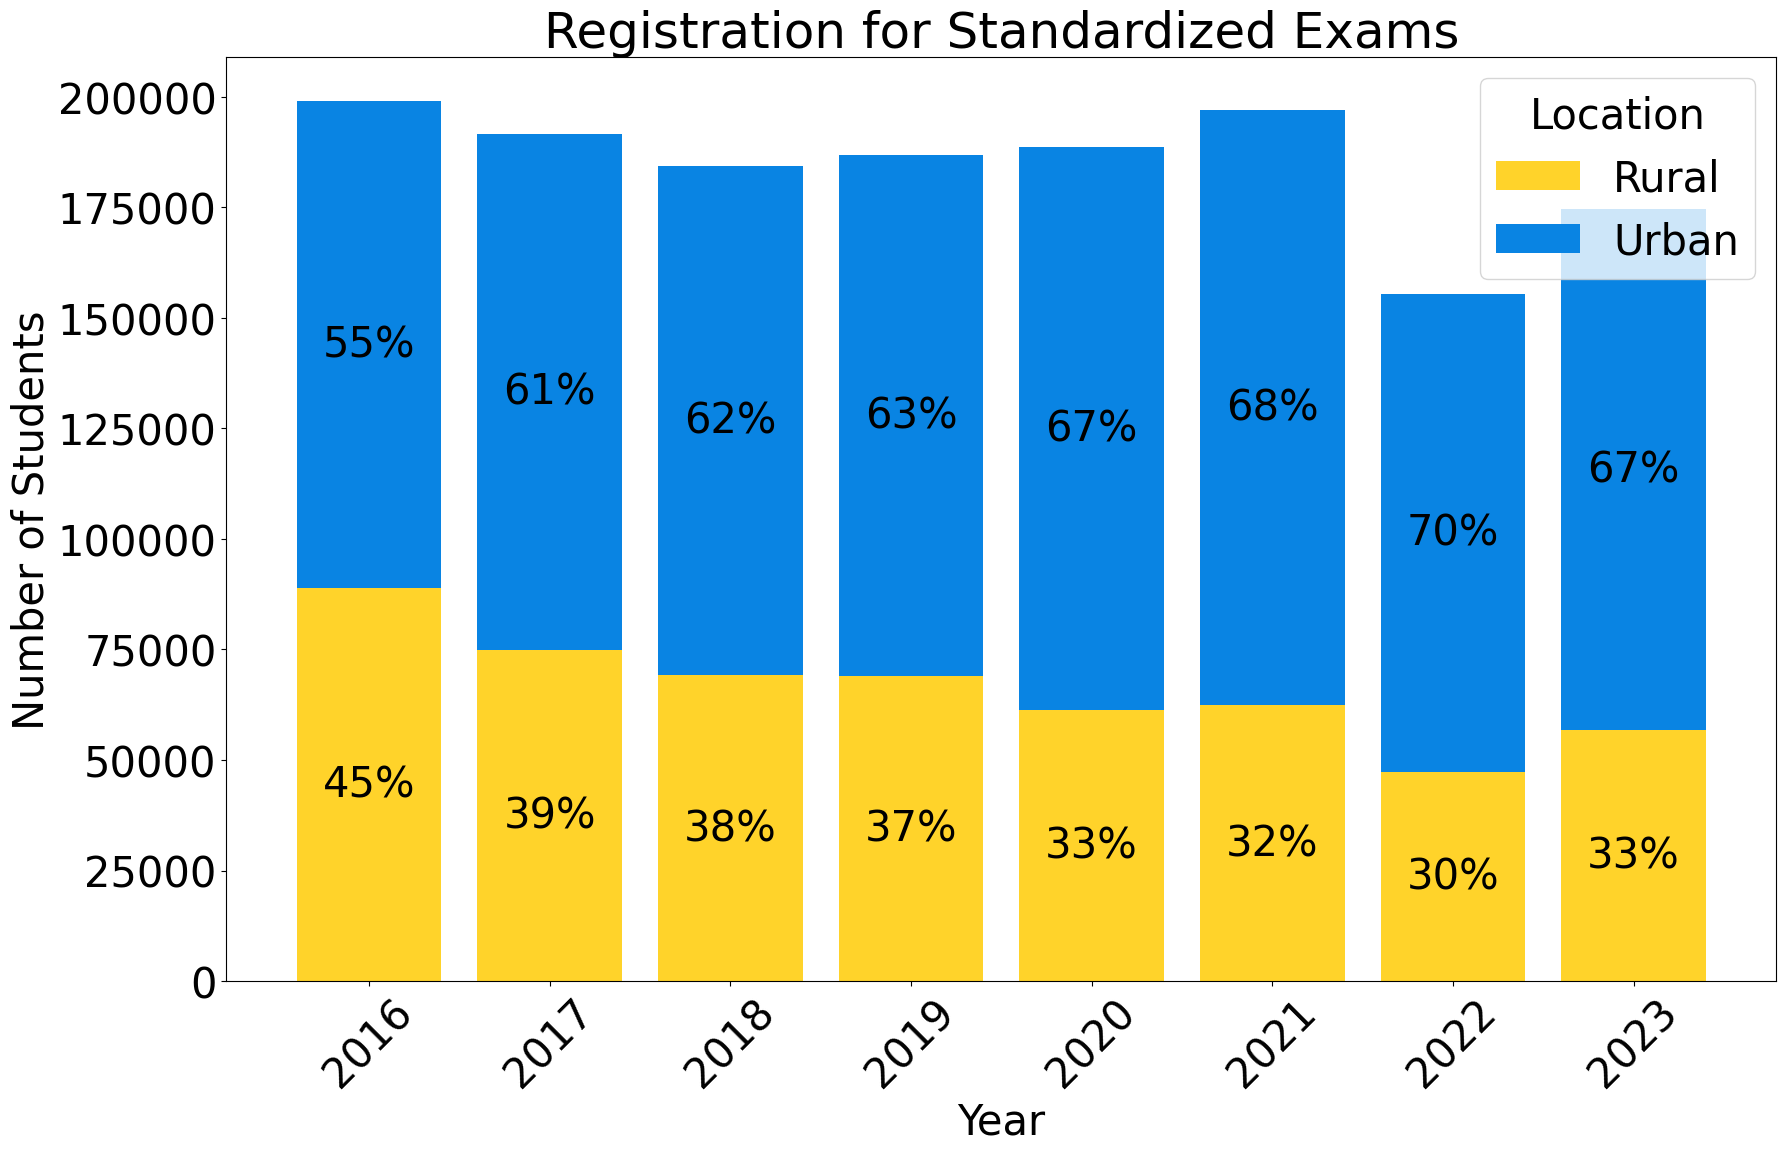

In [48]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_ukr_graduated[df_ukr_graduated.location_type!='Abroad'].groupby(['year', 'location_type']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(20, 12))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for loctype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[loctype], bottom=bottom_pos, label=loctype)
    print(loctype)
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[loctype], start=2016):
        percentage = value / (df_pivot['Urban'][i] + df_pivot['Rural'][i]) * 100
        print(df_pivot.index[i-2016])

        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and loctype=='Rural':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.0f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[loctype]

plt.title('Registration for Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Location', labels=['Rural', 'Urban'])

plt.show()

In [49]:
df_ukr_graduated['displaced'] = np.where(df_ukr_graduated['region_name'] != df_ukr_graduated['region_name_test_center'], 1, 0)

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/3102505695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['displaced'] = np.where(df_ukr_graduated['region_name'] != df_ukr_graduated['region_name_test_center'], 1, 0)


In [50]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'category_test_center',
       'KATOTTG_2023_region_test_center', 'region_name_test_center',
       'location_type', 'displaced'],
      dtype='object')

In [51]:
df_ukr_graduated.category_test_center.unique()

array(['districts in cities', 'city', 'abroad', 'urban village',
       'village', 'settlement'], dtype=object)

In [52]:
df_ukr_graduated['location_test_center_type'] = df_ukr_graduated.category_test_center.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/2184336049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['location_test_center_type'] = df_ukr_graduated.category_test_center.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [53]:
conditions = [
    (df_ukr_graduated['displaced'] == 0),
    (df_ukr_graduated['displaced'] == 1) & (df_ukr_graduated['location_test_center_type'] == 'Abroad'),
    (df_ukr_graduated['displaced'] == 1) & (df_ukr_graduated['location_test_center_type'] != 'Abroad')
]

choices = [
    'Non-displaced',
    'Displaced_abroad',
    'Displaced_internally'
]

df_ukr_graduated['displacement_type'] = np.select(conditions, choices, default='Not Specified')


/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/2943676111.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['displacement_type'] = np.select(conditions, choices, default='Not Specified')


In [54]:
df_ukr_graduated[['year', 'displaced']].value_counts()

year  displaced
2016  0            197797
2021  0            196289
2017  0            191084
2020  0            187275
2019  0            186308
2018  0            183975
2023  0            147650
2022  0            123645
      1             31811
2023  1             27085
2020  1              1236
2016  1              1203
2021  1               638
2017  1               504
2019  1               407
2018  1               334
Name: count, dtype: int64

In [55]:
df_ukr_graduated['test_center_type_gov'] = df_ukr_graduated.region_name_test_center.map(lambda x: 'frontline' if x in ['Donetska', 'Zaporizka', 'Luhanska', 'Mykolaivska', 'Sumska', 'Kharkivska', 'Khersonska', 'Chernihivska'] else ('abroad' if x in ['Czechia', 'Austia', 'Germany', 'Lithuania', 'Slovakia', 'Poland', 'Canada', 'Italy', 'United States of America', 'France', 'United Kingdom',
       'Switzerland', 'Bulgaria', 'Belgium', 'Hungary', 'Spain',
       'Ireland', 'Netherlands', 'Moldova', 'Estonia', 'Romania',
       'Portugal', 'Latvia', 'Luxembourg', 'Sweden', 'Denmark',
       'Slovenia', 'Croatia', 'Georgia', 'Greece', 'Finland', 'Turkey',
       'Norway', 'Azerbaijan'] else 'non-frontline'))

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/1063943710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr_graduated['test_center_type_gov'] = df_ukr_graduated.region_name_test_center.map(lambda x: 'frontline' if x in ['Donetska', 'Zaporizka', 'Luhanska', 'Mykolaivska', 'Sumska', 'Kharkivska', 'Khersonska', 'Chernihivska'] else ('abroad' if x in ['Czechia', 'Austia', 'Germany', 'Lithuania', 'Slovakia', 'Poland', 'Canada', 'Italy', 'United States of America', 'France', 'United Kingdom',


In [56]:
df_ukr_graduated.test_status.unique()

array(['Accepted', 'Failed', 'Canceled', 'Not selected 100-200'],
      dtype=object)

In [57]:
df_ukr_graduated[df_ukr_graduated.test_status == 'Not selected 100-200']

outid  year  score100  score12  score  \
2692     0059750a-a626-40e3-a3f3-24db061e2f8e  2021       NaN      4.0    NaN   
3748     007c1497-6cf0-4886-9799-6dd36e8d668d  2021       NaN      9.0    NaN   
5741     00bbea74-fba5-4444-83ea-df1787878bb8  2021       NaN      4.0    NaN   
6071     00c87d78-6097-4873-bb87-aee67b41b956  2021       NaN     10.0    NaN   
7745     010677da-7ddc-4b29-ae98-7d817d40a973  2021       NaN      2.0    NaN   
...                                       ...   ...       ...      ...    ...   
2178911  fdb689e9-f843-4072-9e12-8e4c65d8a938  2021       NaN      8.0    NaN   
2185492  feb6888b-0b5d-4865-b90d-81e0982e5af4  2021       NaN      3.0    NaN   
2191793  ffacd027-72f9-407a-8bf9-5b2090e0f78b  2021       NaN      7.0    NaN   
2192748  ffd20ad1-6d70-4d11-8a3b-2163725720ae  2021       NaN      2.0    NaN   
2192895  ffd75b0e-e291-4e5a-bf6e-c1360ecb010c  2021       NaN      4.0    NaN   

                  test_status test_subject test_type KATOTTG_2023_test_center  \
2692     Not selected 100-200      ukrtest       EIE      UA21120130010065349   
3748     Not selected 100-200      ukrtest       EIE      UA12020010010114149   
5741     Not selected 100-200      ukrtest       EIE      UA18040190010281147   
6071     Not selected 100-200      ukrtest       EIE      UA63120270010158723   
7745     Not selected 100-200      ukrtest       EIE      UA21020110010043238   
...                       ...          ...       ...                      ...   
2178911  Not selected 100-200      ukrtest       EIE      UA23040030010016724   
2185492  Not selected 100-200      ukrtest       EIE      UA21120070060017663   
2191793  Not selected 100-200      ukrtest       EIE      UA73060150010043412   
2192748  Not selected 100-200      ukrtest       EIE      UA18040190010281147   
2192895  Not selected 100-200      ukrtest       EIE      UA21020110010043238   

        EDRPOU_test_center  ...      region_name abroad category_test_center  \
2692              22099973  ...      Zakarpatska      0                 city   
3748              33109300  ...  Dnipropetrovska      0  districts in cities   
5741              01788183  ...      Zhytomyrskа      0  districts in cities   
6071              24481027  ...       Kharkivska      0  districts in cities   
7745              26397302  ...      Zakarpatska      0                 city   
...                    ...  ...              ...    ...                  ...   
2178911           34524531  ...        Zaporizka      0                 city   
2185492           22100133  ...      Zakarpatska      0              village   
2191793           21435914  ...     Chernivetska      0        urban village   
2192748           01788183  ...      Zhytomyrskа      0  districts in cities   
2192895           26397302  ...      Zakarpatska      0                 city   

         KATOTTG_2023_region_test_center region_name_test_center  \
2692                                UA21             Zakarpatska   
3748                                UA12         Dnipropetrovska   
5741                                UA18             Zhytomyrskа   
6071                                UA63              Kharkivska   
7745                                UA21             Zakarpatska   
...                                  ...                     ...   
2178911                             UA23               Zaporizka   
2185492                             UA21             Zakarpatska   
2191793                             UA73            Chernivetska   
2192748                             UA18             Zhytomyrskа   
2192895                             UA21             Zakarpatska   

        location_type  displaced location_test_center_type displacement_type  \
2692            Rural          0                     Urban     Non-displaced   
3748            Urban          0                     Urban     Non-displaced   
5741            Rural          0                     Urban     Non-displaced

In [58]:
len(df_ukr_graduated[df_ukr_graduated.test_status == 'Not selected 100-200'])

559

In [59]:
df_ukr_graduated[['score12', 'score100']].value_counts()

score12  score100
3.0      0.0         40791
2.0      0.0         26582
10.0     181.0        9079
11.0     190.0        9006
         188.0        8610
                     ...  
2.0      119.0           1
         121.0           1
         124.0           1
3.0      136.0           1
2.0      114.0           1
Name: count, Length: 559, dtype: int64

In [60]:
df_ukr_graduated[df_ukr_graduated.test_status == 'Not selected 100-200'].score12.value_counts()

score12
3.0     146
2.0     116
4.0      75
5.0      48
7.0      42
6.0      40
9.0      26
8.0      23
11.0     14
10.0     12
1.0      12
12.0      5
Name: count, dtype: int64

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
df_ukr_graduated[df_ukr_graduated.score100.isna()].shape

(991, 25)

In [63]:
data = df_ukr_graduated[['score100', 'score12']]
data.drop_duplicates(inplace=True)
data

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/990250651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


score100  score12
0           161.0      9.0
2           160.0      8.0
3           166.0      9.0
7           167.0      7.0
10          167.0      NaN
...           ...      ...
1841397     169.0     12.0
1842556     136.0      3.0
1906097     194.5      NaN
1946844     157.0      5.0
2177015     121.0      8.0

[675 rows x 2 columns]

In [64]:
known_scores = data.dropna()
known_scores

score100  score12
0           161.0      9.0
2           160.0      8.0
3           166.0      9.0
7           167.0      7.0
16          168.0      9.0
...           ...      ...
1793558     135.0      3.0
1841397     169.0     12.0
1842556     136.0      3.0
1946844     157.0      5.0
2177015     121.0      8.0

[559 rows x 2 columns]

In [65]:
missing_scores = data[data['score100'].isna()]
missing_scores.dropna(how='all', inplace=True)
missing_scores

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/3194296155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_scores.dropna(how='all', inplace=True)


score100  score12
2194         NaN      1.0
2692         NaN      4.0
3748         NaN      9.0
6071         NaN     10.0
7745         NaN      2.0
8777         NaN      5.0
13290        NaN      3.0
22801        NaN      7.0
25369        NaN      6.0
74583        NaN     12.0
122112       NaN      8.0
160732       NaN     11.0

In [66]:


# Training a KNN model
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(known_scores[['score12']], known_scores['score100'])

# Predicting the missing score100 values
predicted_scores = knn.predict(missing_scores[['score12']])
missing_scores['score100'] = predicted_scores

# Combining the data back together
df_filled = pd.concat([known_scores, missing_scores])

# Sorting by index if needed to maintain original order
df_filled = df_filled.sort_index()
df_filled

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/2796684868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_scores['score100'] = predicted_scores


score100  score12
0           161.0      9.0
2           160.0      8.0
3           166.0      9.0
7           167.0      7.0
16          168.0      9.0
...           ...      ...
1793558     135.0      3.0
1841397     169.0     12.0
1842556     136.0      3.0
1946844     157.0      5.0
2177015     121.0      8.0

[571 rows x 2 columns]

In [67]:
df_ukr_graduated = df_ukr_graduated[df_ukr_graduated.test_status != 'Not selected 100-200']

In [68]:
df_ukr_graduated.test_status.unique()

array(['Accepted', 'Failed', 'Canceled'], dtype=object)

In [69]:
df_ukr_graduated_took_test = df_ukr_graduated[df_ukr_graduated.test_status != 'Absent']

In [70]:
df_ukr_graduated_took_test[['year', 'displaced']].value_counts()

year  displaced
2016  0            197797
2021  0            195737
2017  0            191084
2020  0            187275
2019  0            186308
2018  0            183975
2023  0            147650
2022  0            123645
      1             31811
2023  1             27085
2020  1              1236
2016  1              1203
2021  1               631
2017  1               504
2019  1               407
2018  1               334
Name: count, dtype: int64

In [71]:
df_ukr_graduated_took_test['test_status'] = df_ukr_graduated_took_test['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

In [72]:
df_ukr_graduated_took_test.test_status.unique()

array(['Accepted', 'Failed'], dtype=object)

In [73]:
data = df_ukr_graduated_took_test[df_ukr_graduated_took_test.test_status == 'Failed']
pivot = pd.pivot_table(data, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Distribution of failure Ukrainian test Graduate Students')
pivot.div(total_pivot).round(2)

Distribution of failure Ukrainian test Graduate Students


outid                                          
year         2016  2017  2018  2019  2020  2021  2022  2023
sextypename                                                
Female       0.28  0.26  0.28  0.27  0.31  0.33  0.43  0.39
Male         0.72  0.74  0.72  0.73  0.69  0.67  0.57  0.61

In [74]:
data = df_ukr_graduated_took_test[df_ukr_graduated_took_test.test_status == 'Failed']
pivot = pd.pivot_table(data, index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Distribution of failure Ukrainian test Graduate Students')
print('2022 is weird since only 74 people failed from 155K')
pivot.div(total_pivot).round(2)

Distribution of failure Ukrainian test Graduate Students
2022 is weird since only 74 people failed from 155K


outid                                       
year           2016  2017  2018 2019 2020  2021 2022  2023
location_type                                             
Rural          0.76  0.75  0.73  0.7  0.6  0.56  0.3  0.52
Urban          0.24  0.25  0.27  0.3  0.4  0.44  0.7  0.48

In [75]:
data = df_ukr_graduated_took_test
pivot = pd.pivot_table(data, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Total accepted rate for Ukrainian test Graduate Students')
pivot.div(total_pivot).round(2)

Total accepted rate for Ukrainian test Graduate Students


outid                                        
year         2016  2017  2018  2019  2020  2021 2022 2023
test_status                                              
Accepted      0.9  0.92  0.92  0.92  0.94  0.95  1.0  1.0
Failed        0.1  0.08  0.08  0.08  0.06  0.05  0.0  0.0

In [76]:
pivot

outid                                                        
year           2016    2017    2018    2019    2020    2021    2022    2023
test_status                                                                
Accepted     179625  176540  168969  170901  177368  185770  155382  174544
Failed        19375   15048   15340   15814   11143   10598      74     191

In [77]:
df_ukr_graduated_passed = df_ukr_graduated_took_test[df_ukr_graduated_took_test.test_status=='Accepted']

In [78]:
df_ukr_graduated_passed[['year', 'displaced']].value_counts()

year  displaced
2021  0            185151
2016  0            178470
2020  0            176212
2017  0            176085
2019  0            170533
2018  0            168662
2023  0            147484
2022  0            123591
      1             31791
2023  1             27060
2020  1              1156
2016  1              1155
2021  1               619
2017  1               455
2019  1               368
2018  1               307
Name: count, dtype: int64

In [79]:
df_ukr_graduated_passed.test_center_type_gov.unique()

array(['non-frontline', 'frontline', 'abroad'], dtype=object)

In [80]:
grouped = df_ukr_graduated_passed.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'sextypename'] == 'Female'].median()),
              ('displaced_mean', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'displaced'] == 1].mean()),
              ('nondisplaced_mean', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'displaced'] == 0].mean()),
              ('displaced_median', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'displaced'] == 1].median()),
              ('nondisplaced_median', lambda x: x[df_ukr_graduated_passed.loc[x.index, 'displaced'] == 0].median())],
    'location_type': [('urban_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: df_ukr_graduated_passed.loc[x.index, 'score100'][df_ukr_graduated_passed.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median',  'displaced_mean', 'nondisplaced_mean', 'displaced_median', 'nondisplaced_median','urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped['F_M_mean'] = grouped['female_mean']-grouped['male_mean']
grouped['F_M_median'] = grouped['female_median']-grouped['male_median']
grouped['Non_Disp_mean'] = grouped['nondisplaced_mean']-grouped['displaced_mean']
grouped['Non_Disp_median'] = grouped['nondisplaced_median']-grouped['displaced_median']
grouped['U_R_mean'] = grouped['urban_mean']-grouped['rural_mean']
grouped['U_R_median'] = grouped['urban_median']-grouped['rural_median']
grouped['Non_Front_mean'] = grouped['non-frontline_test_center_mean']-grouped['frontline_test_center_mean']
grouped['Non_Front_median'] = grouped['non-frontline_test_center_median']-grouped['frontline_test_center_median']
grouped

year   male_mean  female_mean  male_median  female_median  displaced_mean  \
0  2016  141.550138   154.351821        139.0          157.0      152.254113   
1  2017  140.512413   153.441618        138.0          155.0      146.503297   
2  2018  145.058058   157.573730        145.0          162.0      152.807818   
3  2019  143.833781   156.243664        143.0          160.0      146.381793   
4  2020  143.441634   154.789268        142.0          158.0      141.231834   
5  2021  143.637314   154.252865        143.0          157.0      151.111470   
6  2022  153.837177   160.611547        149.0          157.0      158.673304   
7  2023  147.723521   154.463370        146.0          152.0      151.365817   

   nondisplaced_mean  displaced_median  nondisplaced_median  urban_mean  ...  \
0         148.580574             152.0                149.0  155.051583  ...   
1         147.582755             146.0                148.0  153.412773  ...   
2         151.947748             155.0                155.0  157.440503  ...   
3         150.682088             145.0                153.0  155.877729  ...   
4         149.819904             140.0                150.0  153.604280  ...   
5         149.505058             151.0                151.0  153.346376  ...   
6         157.243456             154.0                151.0  159.803905  ...   
7         151.445438             149.0                149.0  154.132957  ...   

   frontline_test_center_median  abroad_test_center_median   F_M_mean  \
0                         147.0                        NaN  12.801682   
1                         145.0                        NaN  12.929205   
2                         152.0                        NaN  12.515672   
3                         150.0                        NaN  12.409883   
4                         148.0                        NaN  11.347634   
5                         149.0                        NaN  10.615551   
6                         149.0                      157.0   6.774369   
7                         148.0                      150.0   6.739849   

   F_M_median  Non_Disp_mean  Non_Disp_median   U_R_mean  U_R_median  \
0        18.0      -3.673539             -3.0  15.583197        22.0   
1        17.0       1.079459              2.0  16.220189        22.0   
2        17.0      -0.860070              0.0  16.002783        23.0   
3        17.0       4.300294              8.0  15.374506        21.0   
4        16.0       8.588071             10.0  12.463950        18.0   
5        14.0      -1.606412              0.0  12.704032        16.0   
6         8.0      -1.429848             -3.0   7.449818        10.0   
7         6.0       0.079621              0.0   8.296010         7.0   

   Non_Front_mean  Non_Front_median  
0        2.076418               3.0  
1        2.039658               4.0  
2        1.522664               3.0  
3        1.561858               3.0  
4        3.166246               4.0  
5        1.692603               2.0  
6        2.172606               5.0  
7        1.347138               1.0  

[8 rows x 29 columns]

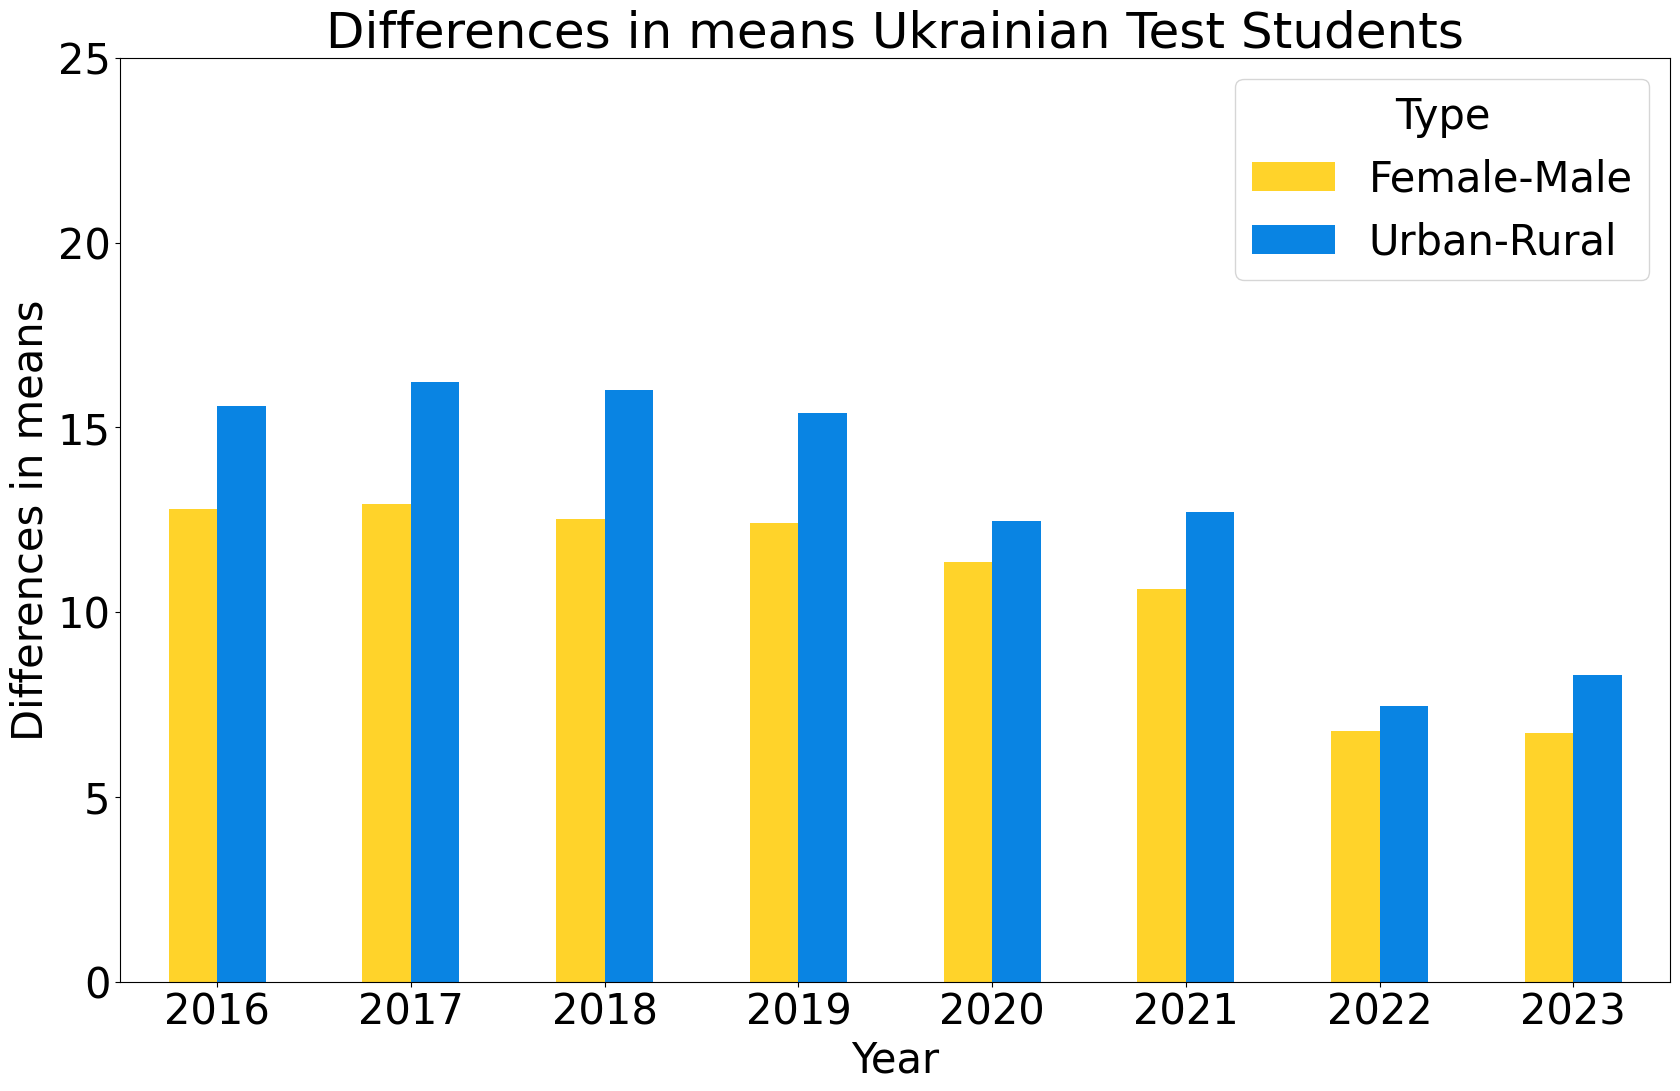

In [81]:
graph = grouped[['year', 'F_M_mean', 'U_R_mean']].set_index('year')
sns.set_palette(['#ffd32a','#0984e3'])
# Plotting
ax = graph.plot(kind='bar', figsize=(20, 12))

# Adding some labels and title
plt.xlabel('Year')
plt.ylabel('Differences in means')
plt.title('Differences in means Ukrainian Test Students')
plt.xticks(rotation=0)
plt.ylim(0, 25)
# Show the legend and the plot
plt.legend(title='Type', labels=['Female-Male', 'Urban-Rural'])
plt.show()


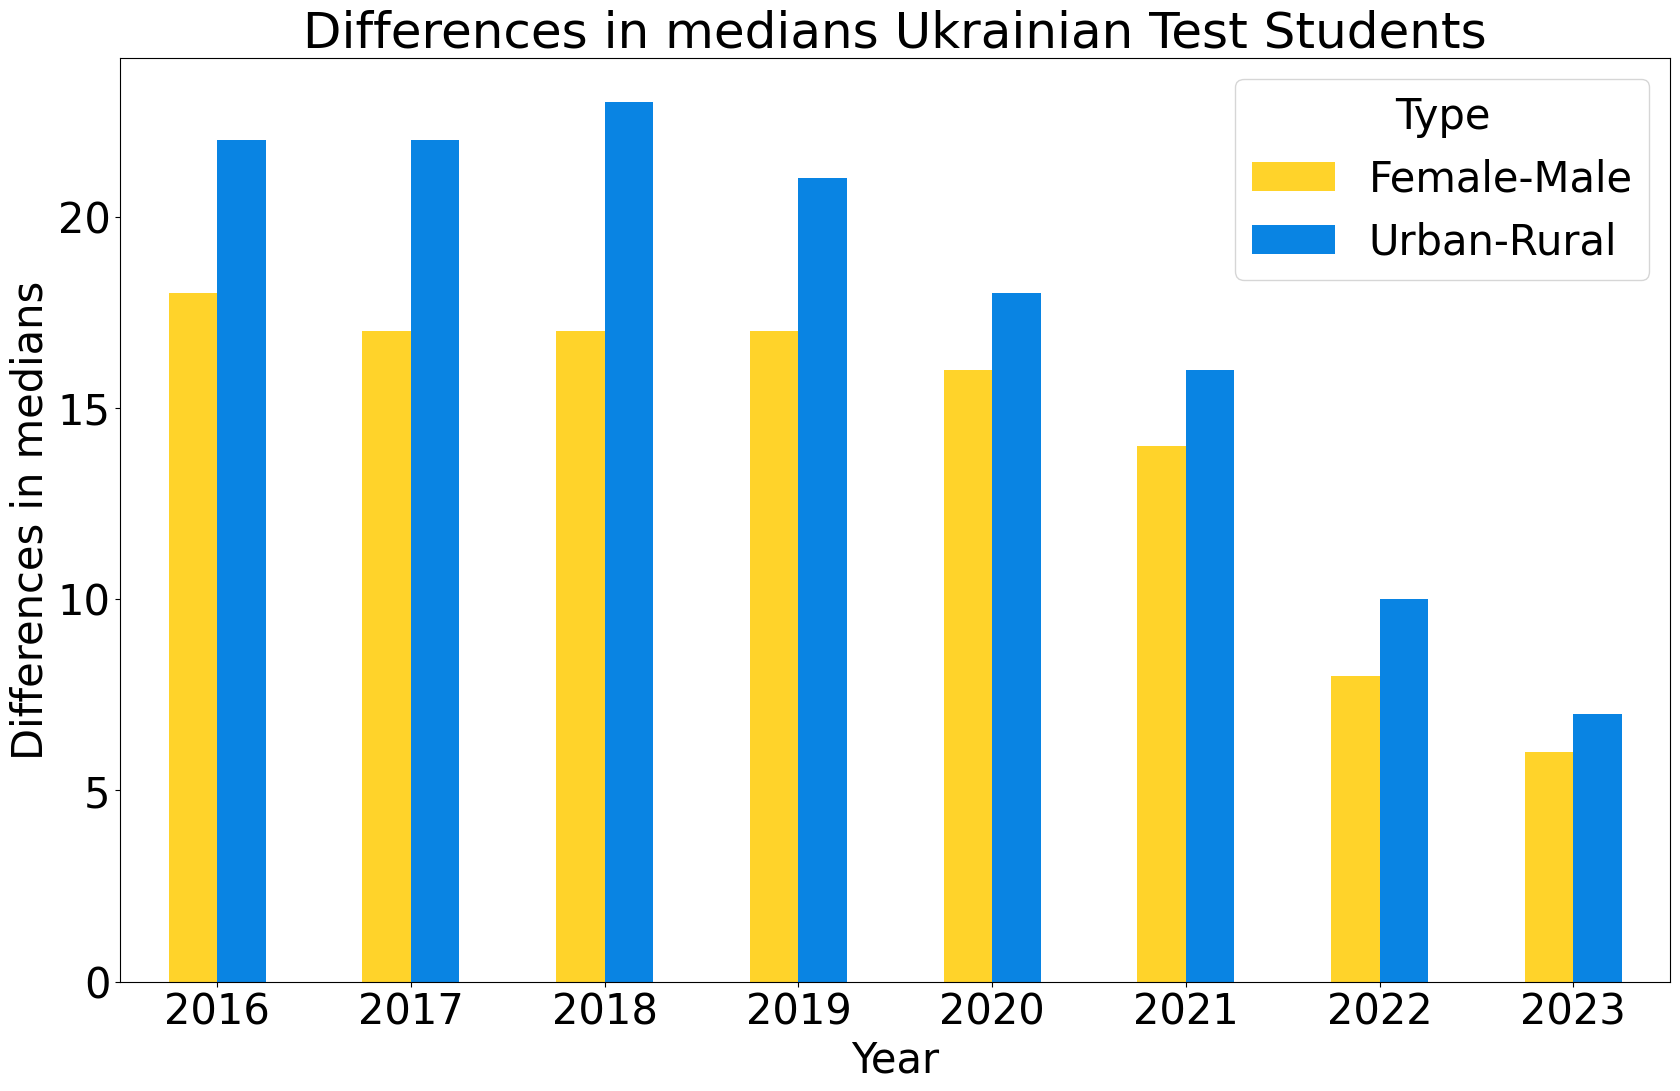

In [82]:
graph = grouped[['year', 'F_M_median', 'U_R_median']].set_index('year')
sns.set_palette(['#ffd32a', '#0984e3'])
# Plotting
ax = graph.plot(kind='bar', figsize=(20, 12))

# Adding some labels and title
plt.xlabel('Year')
plt.ylabel('Differences in medians')
plt.title('Differences in medians Ukrainian Test Students')
plt.xticks(rotation=0)
# plt.ylim(0, 20)
# Show the legend and the plot
plt.legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'NonFrontline-Frontline'])
plt.show()


# Graph2. Displacement performance


/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11

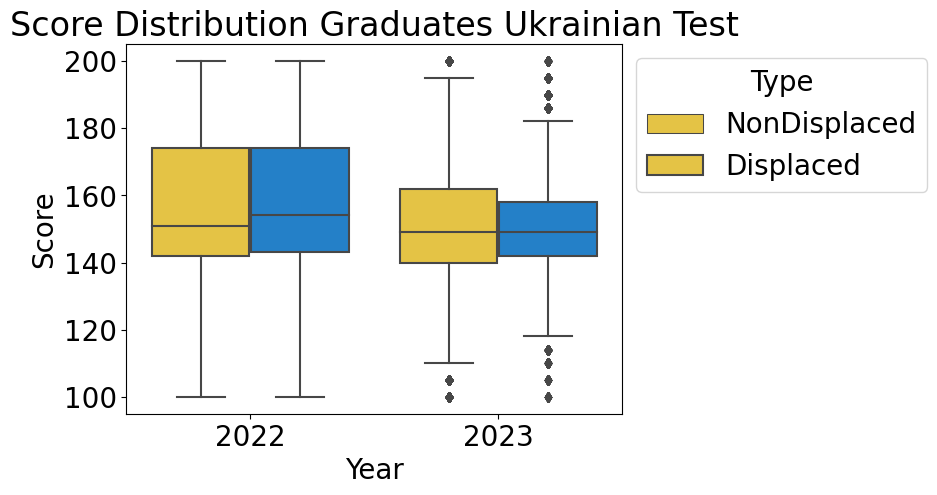

In [83]:
# Use seaborn boxplot to plot the scores
plt.rcParams['font.size'] = 20
data = df_ukr_graduated_passed[df_ukr_graduated_passed.year.isin([2022, 2023])]
sns.set_palette(['#ffd32a', '#0984e3'])
sns.boxplot(data, x='year', y='score100', hue='displaced')


plt.title(f'Score Distribution Graduates Ukrainian Test')
plt.xlabel('Year')
plt.ylabel('Score')
plt.xticks()
plt.yticks()

plt.legend(title='Type', bbox_to_anchor=(1, 1),  labels = ['NonDisplaced', 'Displaced'])

# Adjust layout to make room for the legend
#plt.tight_layout()
# 
plt.show()


/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11

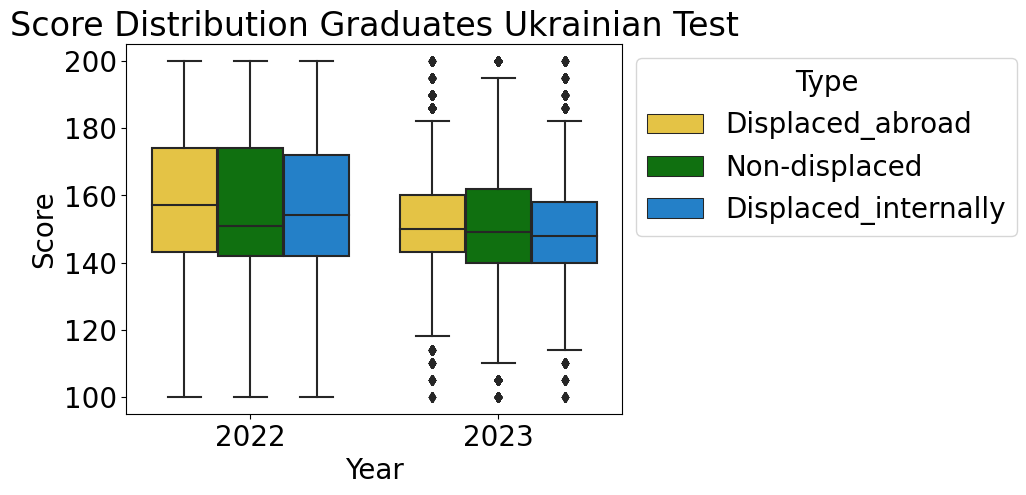

In [84]:
# Use seaborn boxplot to plot the scores

data = df_ukr_graduated_passed[df_ukr_graduated_passed.year.isin([2022, 2023])]
sns.set_palette(['#ffd32a', 'green', '#0984e3'])
sns.boxplot(data, x='year', y='score100', hue='displacement_type')


plt.title(f'Score Distribution Graduates Ukrainian Test')
plt.xlabel('Year')
plt.ylabel('Score')
plt.xticks()
plt.yticks()

plt.legend(title='Type', bbox_to_anchor=(1, 1))
# labels = ['Non-displaced', 'Displaced_abroad', 'Displaced_internally']

# Adjust layout to make room for the legend
#plt.tight_layout()
# 
plt.show()


In [85]:
pivot = pd.pivot_table(data, index = ['displacement_type'], columns = ['year'], values=['score100'], aggfunc='count')
pivot

score100        
year                     2022    2023
displacement_type                    
Displaced_abroad        19945   16958
Displaced_internally    11846   10102
Non-displaced          123591  147484

In [86]:
df_ukr_graduated.columns

Index(['outid', 'year', 'score100', 'score12', 'score', 'test_status',
       'test_subject', 'test_type', 'KATOTTG_2023_test_center',
       'EDRPOU_test_center', 'sextypename', 'EDRPOU_school', 'status', 'age',
       'category', 'region_name', 'abroad', 'category_test_center',
       'KATOTTG_2023_region_test_center', 'region_name_test_center',
       'location_type', 'displaced', 'location_test_center_type',
       'displacement_type', 'test_center_type_gov'],
      dtype='object')

In [87]:
data = df_ukr_graduated[df_ukr_graduated.displaced == 1]
pivot = pd.pivot_table(data, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year         2016  2017  2018  2019  2020  2021  2022  2023
sextypename                                                
Female       0.41  0.48  0.53  0.54  0.29  0.52  0.53  0.52
Male         0.59  0.52  0.47  0.46  0.71  0.48  0.47  0.48

In [88]:
data = df_ukr_graduated[df_ukr_graduated.displaced == 1]
pivot = pd.pivot_table(data, index = ['location_type'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]

pivot.div(total_pivot).round(2)

outid                                          
year           2016  2017  2018  2019  2020  2021  2022  2023
location_type                                                
Rural          0.52  0.31  0.17  0.14  0.08  0.01  0.15  0.15
Urban          0.48  0.69  0.83  0.86  0.92  0.99  0.85  0.85

# Graph 3

In [89]:
data = df_ukr_graduated_passed[(df_ukr_graduated_passed.displaced==0)&(df_ukr_graduated_passed.year.isin([2022, 2023]))]
grouped1 = data.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].median())],
    'location_type': [('urban_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped1.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median', 'urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped1['F_M_mean'] = grouped1['female_mean']-grouped1['male_mean']
grouped1['F_M_median'] = grouped1['female_median']-grouped1['male_median']
grouped1['U_R_mean'] = grouped1['urban_mean']-grouped1['rural_mean']
grouped1['U_R_median'] = grouped1['urban_median']-grouped1['rural_median']
grouped1['Non_Front_mean'] = grouped1['non-frontline_test_center_mean']-grouped1['frontline_test_center_mean']
grouped1['Non_Front_median'] = grouped1['non-frontline_test_center_median']-grouped1['frontline_test_center_median']
grouped1

year   male_mean  female_mean  male_median  female_median  urban_mean  \
0  2022  153.391454   160.381936        147.0          157.0  159.863585   
1  2023  147.617669   154.506944        146.0          152.0  154.614955   

   rural_mean  abroad_mean  urban_median  rural_median  ...  \
0  152.244188          NaN         157.0         147.0  ...   
1  145.766720        143.1         152.0         144.0  ...   

   abroad_test_center_mean  non-frontline_test_center_median  \
0                      NaN                             154.0   
1                    143.1                             149.0   

   frontline_test_center_median  abroad_test_center_median  F_M_mean  \
0                         151.0                        NaN  6.990482   
1                         148.0                      144.0  6.889275   

   F_M_median  U_R_mean  U_R_median  Non_Front_mean  Non_Front_median  
0        10.0  7.619397        10.0        2.166655               3.0  
1         6.0  8.848235         8.0        1.361657               1.0  

[2 rows x 23 columns]

In [90]:
data = df_ukr_graduated_passed[(df_ukr_graduated_passed.displaced==1)&(df_ukr_graduated_passed.year.isin([2022, 2023]))]
grouped2 = data.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].median())],
    'location_type': [('urban_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped2.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median', 'urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped2['F_M_mean'] = grouped2['female_mean']-grouped2['male_mean']
grouped2['F_M_median'] = grouped2['female_median']-grouped2['male_median']
grouped2['U_R_mean'] = grouped2['urban_mean']-grouped2['rural_mean']
grouped2['U_R_median'] = grouped2['urban_median']-grouped2['rural_median']
grouped2['Non_Front_mean'] = grouped2['non-frontline_test_center_mean']-grouped2['frontline_test_center_mean']
grouped2['Non_Front_median'] = grouped2['non-frontline_test_center_median']-grouped2['frontline_test_center_median']
grouped2

year   male_mean  female_mean  male_median  female_median  urban_mean  \
0  2022  155.479973   161.545889        151.0          160.0  159.624588   
1  2023  148.259818   154.210564        146.0          152.0  152.156532   

   rural_mean  abroad_mean  urban_median  rural_median  ...  \
0  153.326739          NaN         157.0         148.0  ...   
1  146.769637          NaN         150.0         145.0  ...   

   abroad_test_center_mean  non-frontline_test_center_median  \
0               159.503134                             154.0   
1               152.034261                             148.0   

   frontline_test_center_median  abroad_test_center_median  F_M_mean  \
0                         149.0                      157.0  6.065916   
1                         146.0                      150.0  5.950746   

   F_M_median  U_R_mean  U_R_median  Non_Front_mean  Non_Front_median  
0         9.0  6.297849         9.0        2.783209               5.0  
1         6.0  5.386894         5.0        1.646206               2.0  

[2 rows x 23 columns]

Text(0.5, 1.0, 'Displaced')

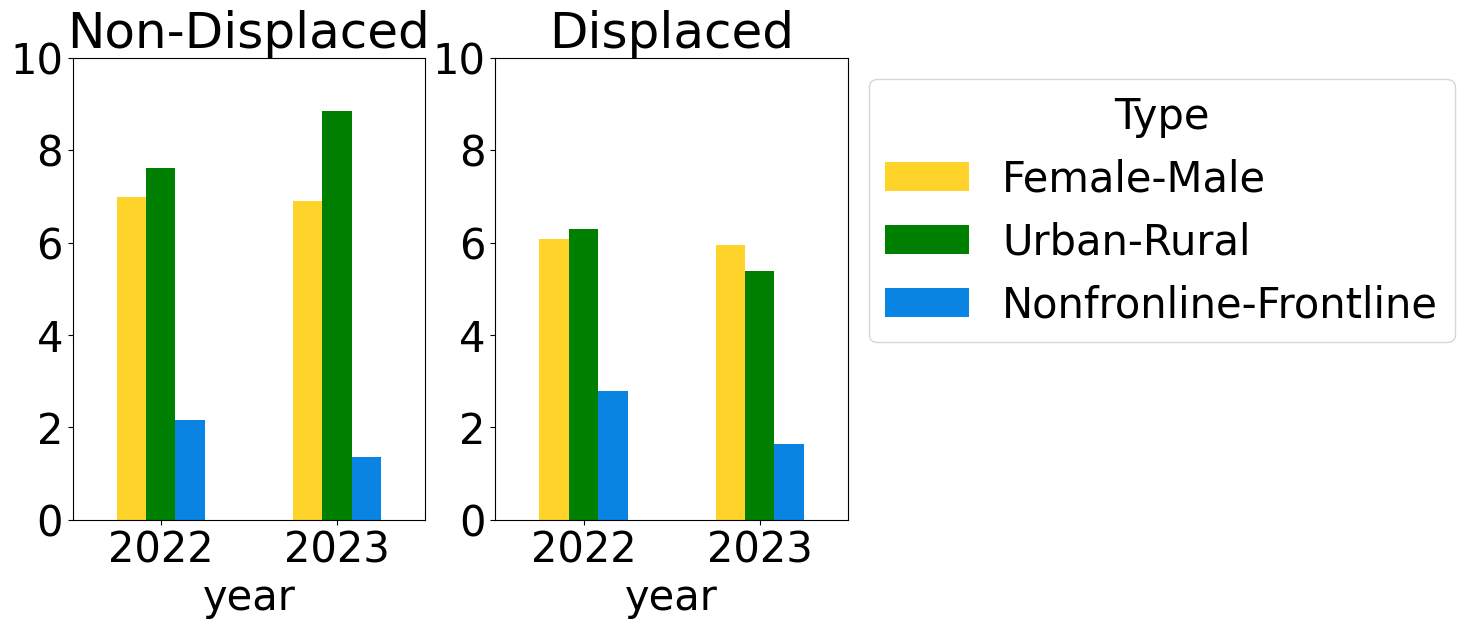

In [91]:
plt.rcParams['font.size'] = 30
fig, axs = plt.subplots(ncols=2,figsize=(40,12))
sns.set_palette(['#ffd32a','green', '#0984e3'])
# fig.suptitle('Differences in means Ukrainian Test Students Displaced vs Non-Displaced')
graph1 = grouped1[['year', 'F_M_mean', 'U_R_mean', 'Non_Front_mean']].set_index('year')
graph1.plot(kind='bar', figsize=(10, 6), ax=axs[0])
axs[0].set_ylim(0, 10)
graph2 = grouped2[['year', 'F_M_mean', 'U_R_mean', 'Non_Front_mean']].set_index('year')
graph2.plot(kind='bar', figsize=(10, 6), ax=axs[1])

# plt.setp(axs, xlim=(0, 10), ylim=(0, 10))

axs[1].set_ylim(0, 10)
axs[0].tick_params(labelrotation=0)
axs[1].tick_params(labelrotation=0)
# axs[0].legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'Nonfronline-Frontline'], bbox_to_anchor=(1, 1), loc='upper left')
axs[0].get_legend().remove()
axs[1].legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'Nonfronline-Frontline'], bbox_to_anchor=(1, 1), loc='upper left')
axs[0].set_title('Non-Displaced')
axs[1].set_title('Displaced')

In [92]:
df_ukr_graduated_passed.displacement_type.unique()

array(['Non-displaced', 'Displaced_abroad', 'Displaced_internally'],
      dtype=object)

In [93]:
data = df_ukr_graduated_passed[(df_ukr_graduated_passed.displacement_type=='Non-displaced')&(df_ukr_graduated_passed.year.isin([2022, 2023]))]
grouped1 = data.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].median())],
    'location_type': [('urban_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped1.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median', 'urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped1['F_M_mean'] = grouped1['female_mean']-grouped1['male_mean']
grouped1['F_M_median'] = grouped1['female_median']-grouped1['male_median']
grouped1['U_R_mean'] = grouped1['urban_mean']-grouped1['rural_mean']
grouped1['U_R_median'] = grouped1['urban_median']-grouped1['rural_median']
grouped1['Non_Front_mean'] = grouped1['non-frontline_test_center_mean']-grouped1['frontline_test_center_mean']
grouped1['Non_Front_median'] = grouped1['non-frontline_test_center_median']-grouped1['frontline_test_center_median']
grouped1

year   male_mean  female_mean  male_median  female_median  urban_mean  \
0  2022  153.391454   160.381936        147.0          157.0  159.863585   
1  2023  147.617669   154.506944        146.0          152.0  154.614955   

   rural_mean  abroad_mean  urban_median  rural_median  ...  \
0  152.244188          NaN         157.0         147.0  ...   
1  145.766720        143.1         152.0         144.0  ...   

   abroad_test_center_mean  non-frontline_test_center_median  \
0                      NaN                             154.0   
1                    143.1                             149.0   

   frontline_test_center_median  abroad_test_center_median  F_M_mean  \
0                         151.0                        NaN  6.990482   
1                         148.0                      144.0  6.889275   

   F_M_median  U_R_mean  U_R_median  Non_Front_mean  Non_Front_median  
0        10.0  7.619397        10.0        2.166655               3.0  
1         6.0  8.848235         8.0        1.361657               1.0  

[2 rows x 23 columns]

In [94]:
data = df_ukr_graduated_passed[(df_ukr_graduated_passed..displacement_type=='Non-displaced')&(df_ukr_graduated_passed.year.isin([2022, 2023]))]
grouped2 = data.groupby('year').agg({
    'score100': [('male_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].mean()),
              ('female_mean', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].mean()),
              ('male_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Male'].median()),
              ('female_median', lambda x: x[data.loc[x.index, 'sextypename'] == 'Female'].median())],
    'location_type': [('urban_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].mean()),
                 ('rural_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].mean()),
                 ('abroad_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].mean()),
                 ('urban_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Urban'].median()),
                 ('rural_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Rural'].median()),
                 ('abroad_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'location_type'] == 'Abroad'].median())],
    'test_center_type_gov': [('non-frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].mean()),
                ('frontline_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].mean()),
                ('abroad_test_center_mean', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].mean()),
                ('non-frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'non-frontline'].median()),
                ('frontline_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'frontline'].median()),
                ('abroad_test_center_median', lambda x: data.loc[x.index, 'score100'][data.loc[x.index, 'test_center_type_gov'] == 'abroad'].median())]

}).reset_index()

# Clean up the multi-level column names
grouped2.columns = ['year', 'male_mean', 'female_mean', 'male_median', 'female_median', 'urban_mean', 'rural_mean', 'abroad_mean', 'urban_median', 'rural_median', 'abroad_median', 'non-frontline_test_center_mean', 'frontline_test_center_mean', 'abroad_test_center_mean', 'non-frontline_test_center_median', 'frontline_test_center_median', 'abroad_test_center_median']

grouped2['F_M_mean'] = grouped2['female_mean']-grouped2['male_mean']
grouped2['F_M_median'] = grouped2['female_median']-grouped2['male_median']
grouped2['U_R_mean'] = grouped2['urban_mean']-grouped2['rural_mean']
grouped2['U_R_median'] = grouped2['urban_median']-grouped2['rural_median']
grouped2['Non_Front_mean'] = grouped2['non-frontline_test_center_mean']-grouped2['frontline_test_center_mean']
grouped2['Non_Front_median'] = grouped2['non-frontline_test_center_median']-grouped2['frontline_test_center_median']
grouped2

SyntaxError: invalid syntax (2966299966.py, line 1)

In [95]:


# Plotting
ax = 

# Adding some labels and title
plt.xlabel('Year')
plt.ylabel('Differences in means')
plt.title('Differences in means Ukrainian Test Students')
plt.xticks(rotation=0)

# Show the legend and the plot
plt.legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'NonFrontline-Frontline'])
plt.show()


SyntaxError: invalid syntax (2830314256.py, line 2)

In [96]:




sns.kdeplot(data=df[(df.test_subject==subject)&(df.test_status=='Accepted')&(df.year==year)&(df.age.isin([16,17]))], x="score100", hue="sextypename", fill=True, common_norm=False, alpha=0.4, ax=axs[i])
axs[i].set_title(f'{subject}')

plt.suptitle(f'Distribution of the scores of participants (16-17 years old) by test and gender in {year}', fontsize=17)

IndexError: index 2023 is out of bounds for axis 0 with size 2

In [ ]:
graph = grouped[['year', 'F_M_median', 'U_R_median']].set_index('year')
sns.set_palette(['#ffd32a', '#0984e3'])
# Plotting
ax = graph.plot(kind='bar', figsize=(10, 6))

# Adding some labels and title
plt.xlabel('Year')
plt.ylabel('Differences in medians')
plt.title('Differences in medians Ukrainian Test Students')
plt.xticks(rotation=0)
# plt.ylim(0, 20)
# Show the legend and the plot
plt.legend(title='Type', labels=['Female-Male', 'Urban-Rural', 'NonFrontline-Frontline'])
plt.show()


/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_37669/1384190755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ukr_graduated_passed, x='year', y='score100',  palette='YlGnBu')


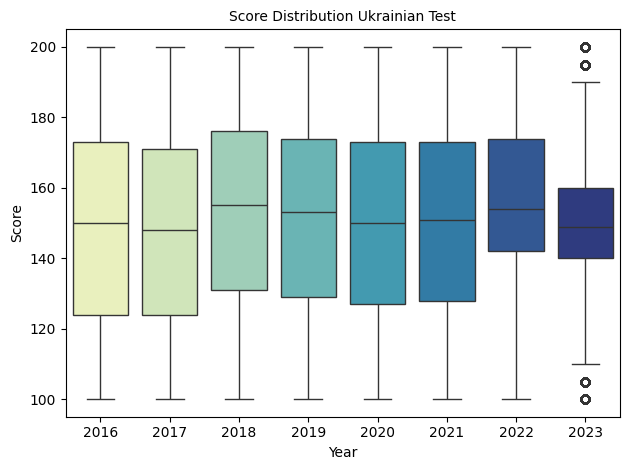

In [ ]:


# Use seaborn boxplot to plot the scores
sns.boxplot(data=df_ukr_graduated_passed, x='year', y='score100',  palette='YlGnBu')

plt.title('Score Distribution Ukrainian Test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move the legend outside the plot
# plt.legend(title='Frontline Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()


# Math

In [97]:
df_math_graduated = df_graduated_tests[df_graduated_tests.test_subject == 'mathtest']
sum(df_math_graduated.duplicated())

0

In [98]:
df_math_graduated

outid  year  score100  score12  score  \
3666450  0000268f-9fdd-49b2-9ee2-422778c9c4f1  2016     181.0     11.0    NaN   
3666451  0000324e-f525-49c4-a963-8df0cc02d6d5  2018     172.0      9.0   42.0   
3666454  000051f8-9476-49b5-83c2-4797a201b706  2021     133.0      6.0   21.0   
3666456  000069ec-4f21-4e21-9dd9-58bc986d1a0e  2022     149.0      NaN   15.0   
3666459  0000EC46-785B-4F8B-907E-18E78211124D  2017     195.0     12.0    NaN   
...                                       ...   ...       ...      ...    ...   
5036567  ffff6f3c-08bd-4204-aae2-3260fd5ca334  2021     151.0      8.0   30.0   
5036568  ffff778c-a380-4885-b293-94b1b4877945  2021     100.0      4.0   10.0   
5036569  ffff8e58-5322-4b21-a385-d1fee504c2a8  2021     122.0      5.0   16.0   
5036570  ffffb2e5-b2a1-4f51-871b-d281c20e72e8  2019     104.0      4.0   12.0   
5036572  ffffeeb2-7258-4465-bca3-88dd19902340  2019     180.0     10.0   46.0   

        test_status test_subject test_type KATOTTG_2023_test_center  \
3666450    Accepted     mathtest       EIE      UA63120270010948820   
3666451    Accepted     mathtest       EIE      UA46100230010074173   
3666454    Accepted     mathtest       EIE      UA46120090010078401   
3666456    Accepted     mathtest       NMT      OC32010000000000000   
3666459    Accepted     mathtest       EIE      UA12060170010270453   
...             ...          ...       ...                      ...   
5036567    Accepted     mathtest       EIE      UA12080050010010114   
5036568    Accepted     mathtest       EIE      UA32040010010093209   
5036569    Accepted     mathtest       EIE      UA51040010010048834   
5036570    Accepted     mathtest       EIE      UA32080090010037585   
5036572    Accepted     mathtest       EIE      UA12020010010639502   

        EDRPOU_test_center sextypename EDRPOU_school  \
3666450           02071197        Male      23320374   
3666451           02545471        Male      20773804   
3666454           22375166      Female      22375255   
3666456                NaN        Male      41554418   
3666459           37861079        Male      33422840   
...                    ...         ...           ...   
5036567           20250006      Female      21929680   
5036568           41993784        Male      22203206   
5036569           00728546        Male      25417118   
5036570           25668443        Male      25667248   
5036572           26508368        Male      26509416   

                                                    status  age  \
3666450  A graduate of an Ukrainian school of the curre...   18   
3666451  A graduate of an Ukrainian school of the curre...   17   
3666454  A graduate of an Ukrainian school of the curre...   18   
3666456  A graduate of an Ukrainian school of the curre...   18   
3666459  A graduate of an Ukrainian school of the curre...   17   
...                                                    ...  ...   
5036567  A graduate of an Ukrainian school of the curre...   17   
5036568  A graduate of an Ukrainian school of the curre...   17   
5036569  A graduate of an Ukrainian school of the curre...   17   
5036570  A graduate of an Ukrainian school of the curre...   17   
5036572  A graduate of an Ukrainian school of the curre...   17   

                    category      region_name  abroad category_test_center  \
3666450  districts in cities       Kharkivska       0  districts in cities   
3666451                 city          Lvivska       0                 city   
3666454              village          Lvivska       0                 city   
3666456        urban village  Dnipropetrovska       0               abroad   
3666459  districts in cities  Dnipropetrovska       0  districts in cities   
...                      ...              ...     ...                  ...   
5036567                 city  Dnipropetrovska       0                 city   
5036568              village          Kyivska       0                 city   
5036569                 city      

In [99]:
df_math_graduated['location_type'] = df_math_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/2832018361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_graduated['location_type'] = df_math_graduated.category.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [100]:

subj= pd.pivot_table(df_graduated_tests, index = ['test_subject'], columns = ['year'], values=['outid'], aggfunc='count')

total = [len(df_graduated_tests[df_graduated_tests['year']==year].outid.unique()) for year in range(2016, 2024)]

subj.div(total).round(2)

outid                                         
year          2016  2017  2018  2019  2020  2021 2022  2023
test_subject                                               
biotest       0.27  0.36  0.34  0.33  0.29  0.28  NaN  0.12
chemtest      0.09  0.09  0.08  0.06  0.04  0.03  NaN  0.01
deutest       0.01  0.01  0.01  0.01  0.01  0.01  NaN  0.01
engtest       0.32  0.35  0.39  0.41  0.45  0.50  NaN  0.33
fratest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
geotest       0.20  0.31  0.36  0.36  0.38  0.41  NaN   NaN
histtest      0.73  0.76  0.74  0.70  0.66  0.67  1.0  0.51
mathsttest     NaN   NaN   NaN   NaN   NaN  0.03  NaN   NaN
mathtest      0.49  0.47  0.48  0.52  0.57  0.83  1.0  1.00
phystest      0.11  0.10  0.09  0.09  0.09  0.09  NaN  0.02
rustest       0.00  0.01   NaN   NaN   NaN   NaN  NaN   NaN
spatest       0.00  0.00  0.00  0.00  0.00  0.00  NaN  0.00
ukrtest       1.00  1.00  1.00  1.00  1.00  1.00  1.0  1.00
umltest        NaN   NaN   NaN   NaN   NaN  0.78  NaN   NaN

Female
Male


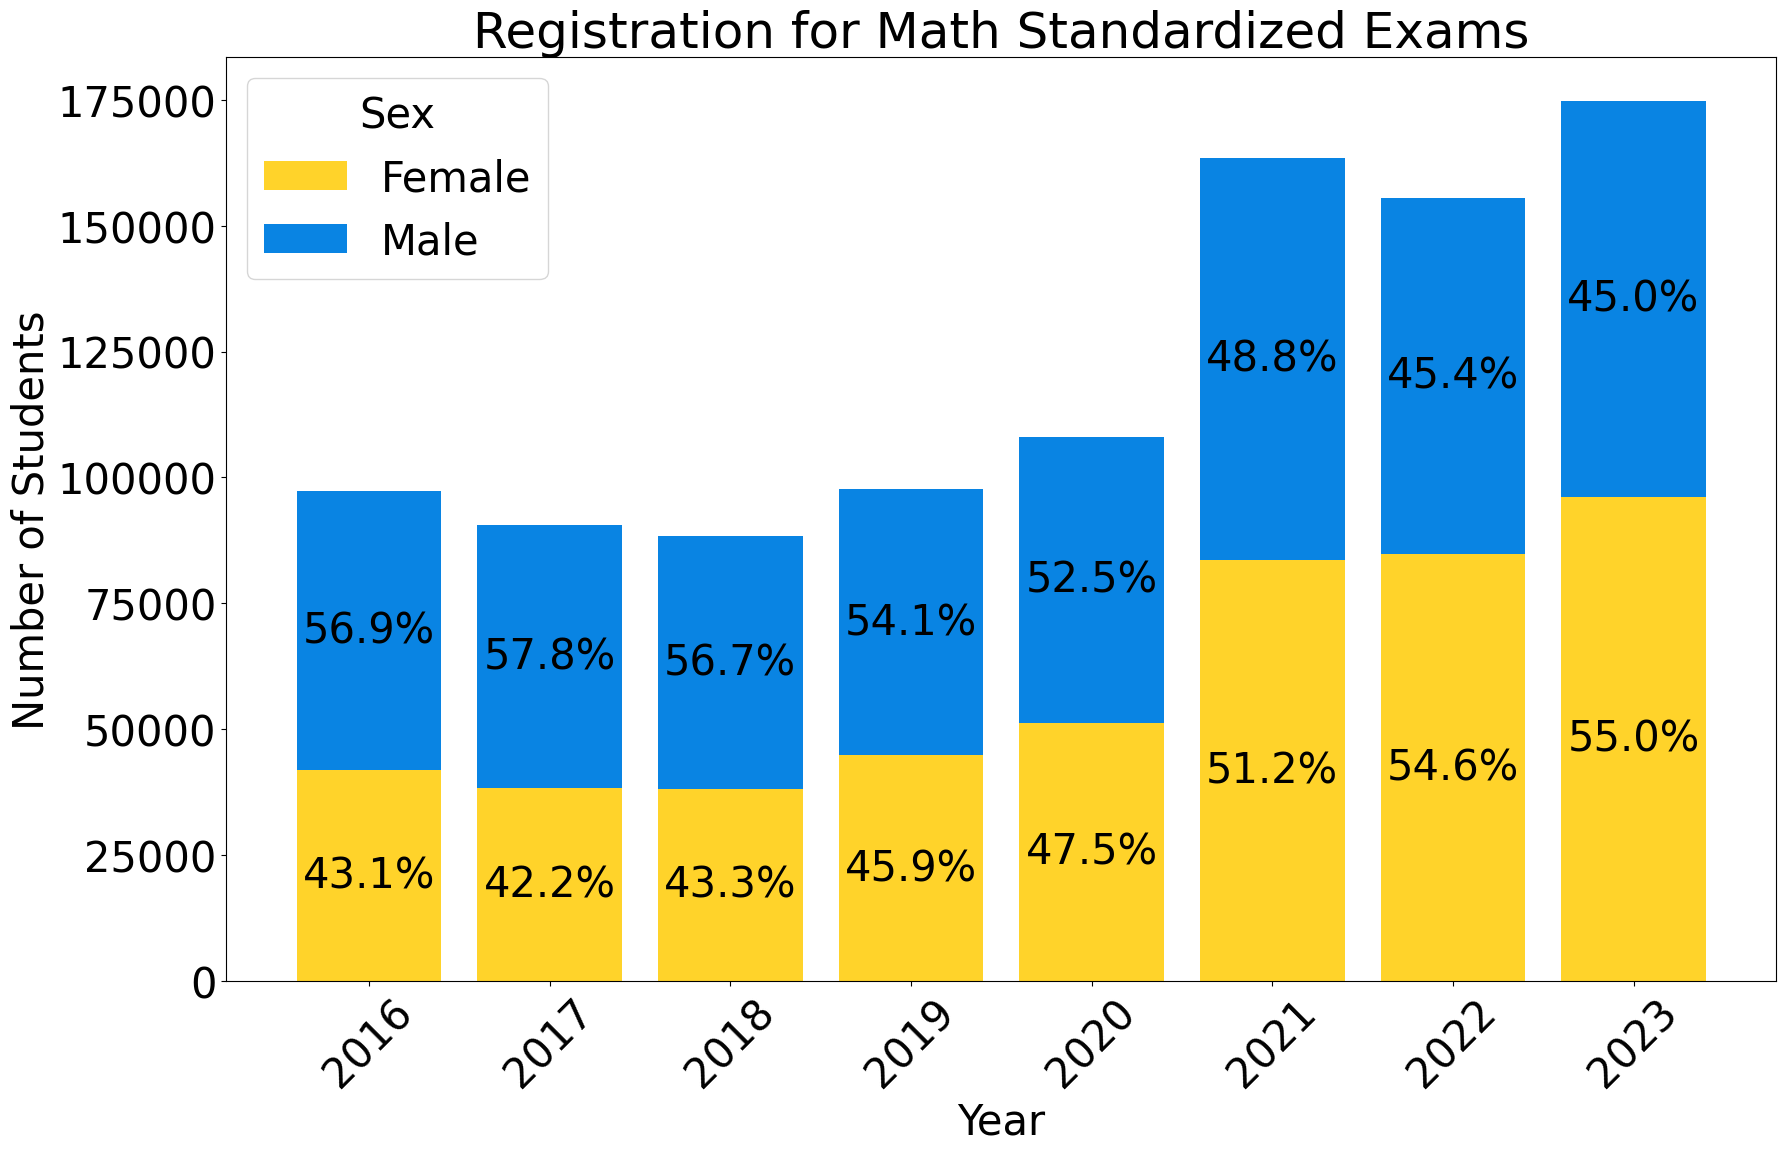

In [120]:
plt.rcParams['font.size'] = 30
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_math_graduated.groupby(['year', 'sextypename']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(20, 12))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for sextype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[sextype], bottom=bottom_pos, label=sextype)
    print(sextype)
    
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[sextype], start=2016):
        percentage = value / (df_pivot['Male'][i] + df_pivot['Female'][i]) * 100

        # print(bottom_pos[i-2016] + (value/2))
        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and sextype=='Female':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[sextype]

plt.title('Registration for Math Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Sex')

plt.show()

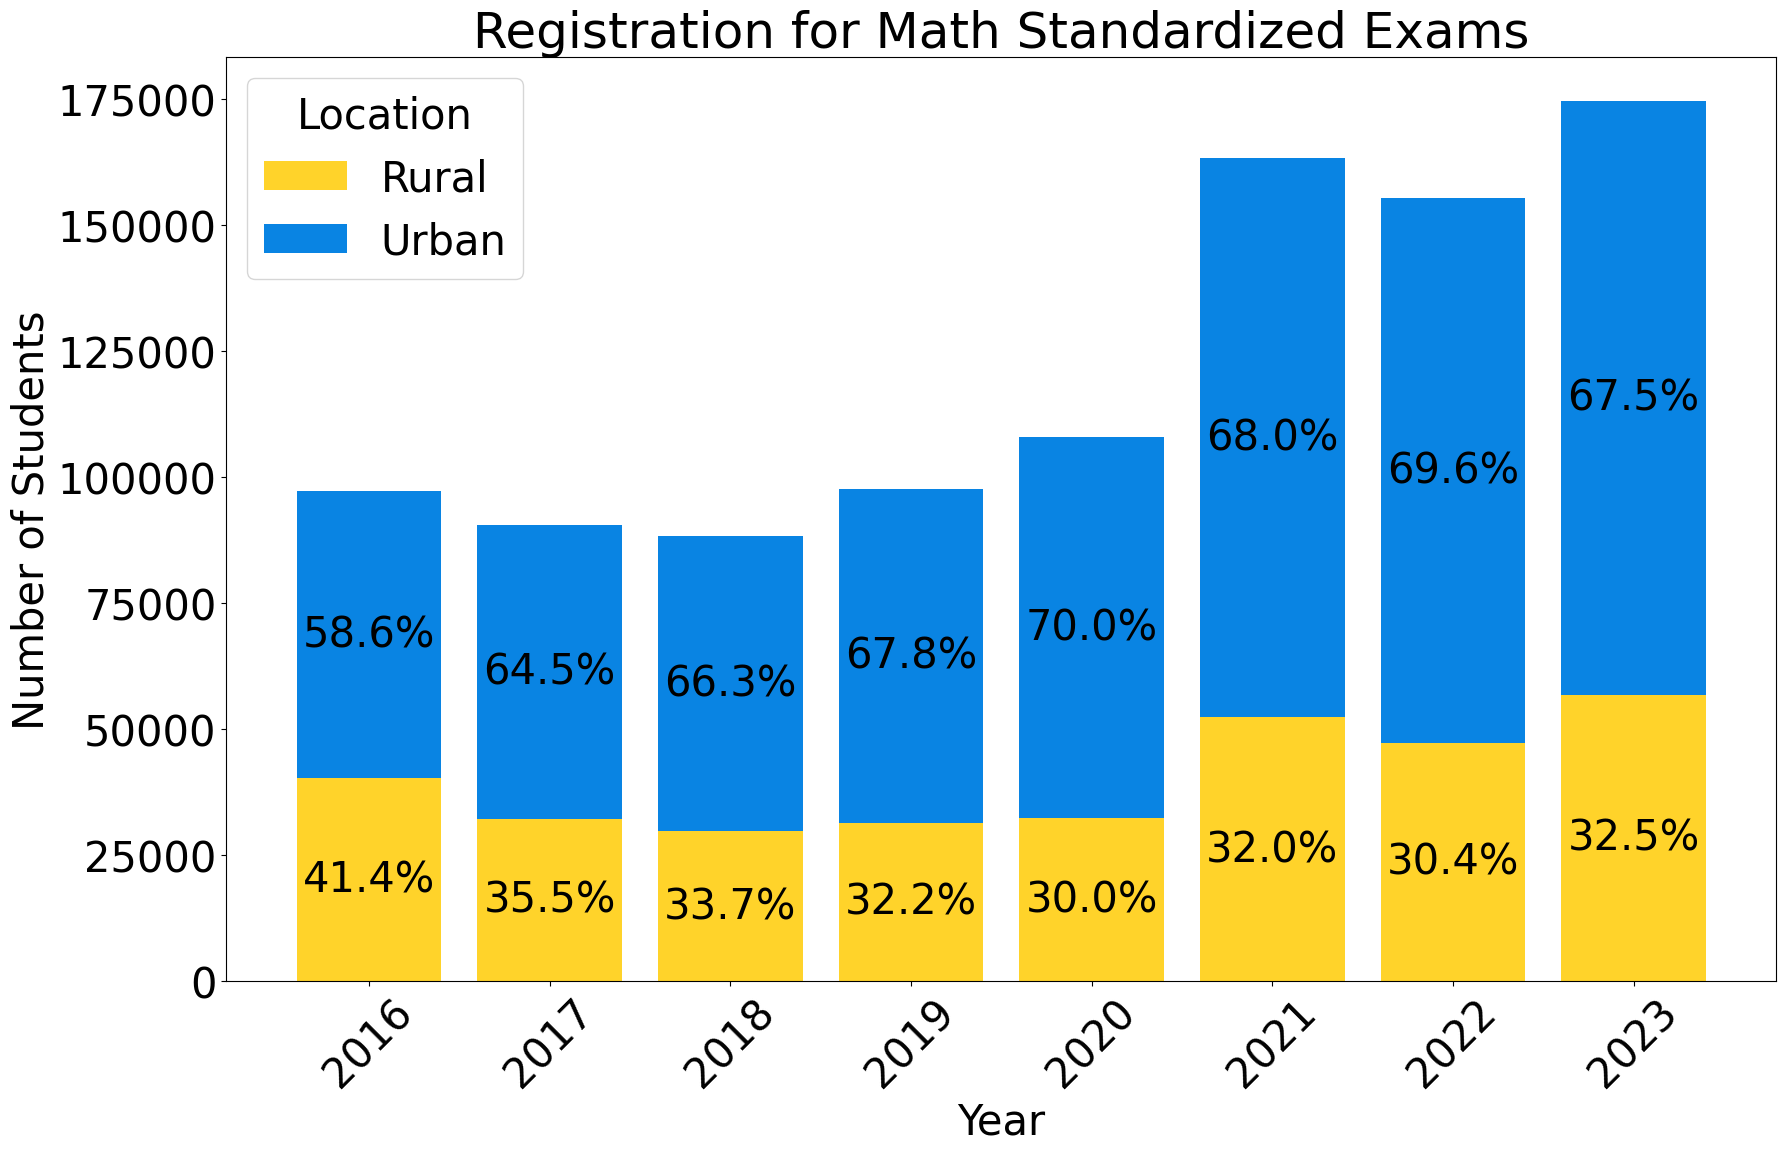

In [121]:
# Convert data to have separate columns for each sextypename, counting occurrences
df_pivot = df_math_graduated[df_math_graduated.location_type!='Abroad'].groupby(['year', 'location_type']).size().unstack(fill_value=0)

# Now df_pivot has separate columns for 'Female' and 'Male', indexed by 'year'

# Plotting
plt.figure(figsize=(20, 12))
sns.set_palette(['#ffd32a','#0984e3'])

# Bottom position for the bars
bottom_pos = np.zeros(len(df_pivot))

# Loop through each sextypename to plot
for loctype in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[loctype], bottom=bottom_pos, label=loctype)
    # Calculate percentages for annotations
    for i, value in enumerate(df_pivot[loctype], start=2016):
        percentage = value / (df_pivot['Urban'][i] + df_pivot['Rural'][i]) * 100

        # Determine position for the percentage text
        # Adjust these values as needed for readability
        if value > 0 and loctype=='Rural':  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i-2016] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
        elif value > 0:  # Only add text if there are students of this sextype
            plt.text(df_pivot.index[i-2016], bottom_pos[i] + (value/2), f'{percentage:.1f}%', 
                     ha='center', va='center', color='black')
    
    bottom_pos += df_pivot[loctype]

plt.title('Registration for Math Standardized Exams')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Location', labels=['Rural', 'Urban'])

plt.show()

In [105]:
df_math_graduated['displaced'] = np.where(df_math_graduated['region_name'] != df_math_graduated['region_name_test_center'], 1, 0)

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/3779538540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_graduated['displaced'] = np.where(df_math_graduated['region_name'] != df_math_graduated['region_name_test_center'], 1, 0)


In [106]:
df_math_graduated['location_test_center_type'] = df_math_graduated.category_test_center.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))

/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/2353933480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_graduated['location_test_center_type'] = df_math_graduated.category_test_center.map(lambda x: 'Rural' if x in ['village', 'urban village','settlement']  else ('Abroad' if x == 'abroad' else 'Urban'))


In [107]:
conditions = [
    (df_math_graduated['displaced'] == 0),
    (df_math_graduated['displaced'] == 1) & (df_math_graduated['location_test_center_type'] == 'Abroad'),
    (df_math_graduated['displaced'] == 1) & (df_math_graduated['location_test_center_type'] != 'Abroad')
]

choices = [
    'Non-displaced',
    'Displaced_abroad',
    'Displaced_internally'
]

df_math_graduated['displacement_type'] = np.select(conditions, choices, default='Not Specified')


/var/folders/0h/rk9k32wd7q19kh85p5flfq_r0000gn/T/ipykernel_1633/2046147604.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_graduated['displacement_type'] = np.select(conditions, choices, default='Not Specified')


In [108]:
df_math_graduated.test_status.unique()

array(['Accepted', 'Failed', 'Not selected 100-200', 'Canceled'],
      dtype=object)

In [109]:
len(df_math_graduated[df_math_graduated.test_status == 'Not selected 100-200'])

131

In [110]:
df_math_graduated = df_math_graduated[df_math_graduated.test_status != 'Not selected 100-200']

In [111]:
df_math_graduated_took_test = df_math_graduated[df_math_graduated.test_status != 'Absent']

In [112]:
df_math_graduated_took_test['test_status'] = df_math_graduated_took_test['test_status'].map(lambda x: 'Failed' if x == 'Canceled' else x)

In [113]:
df_math_graduated_took_test.test_status.unique()

array(['Accepted', 'Failed'], dtype=object)

In [114]:
data = df_math_graduated_took_test
pivot = pd.pivot_table(data, index = ['test_status'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Distribution test status Math test Graduate Students')
pivot.div(total_pivot).round(2)

Distribution test status Math test Graduate Students


outid                                         
year         2016  2017  2018  2019  2020  2021 2022  2023
test_status                                               
Accepted     0.87  0.86  0.85  0.89  0.91  0.75  1.0  0.96
Failed       0.13  0.14  0.15  0.11  0.09  0.25  0.0  0.04

In [115]:
data = df_math_graduated_took_test[df_math_graduated_took_test.test_status == 'Failed']
pivot = pd.pivot_table(data, index = ['sextypename'], columns = ['year'], values=['outid'], aggfunc='count')
total_pivot = [len(data[data['year']==year].outid.unique()) for year in range(2016, 2024)]
print('Distribution of failure Math test Graduate Students')
pivot.div(total_pivot).round(2)

Distribution of failure Math test Graduate Students


outid                                          
year         2016  2017  2018  2019  2020  2021  2022  2023
sextypename                                                
Female       0.35  0.33  0.37  0.39  0.45  0.52  0.54  0.58
Male         0.65  0.67  0.63  0.61  0.55  0.48  0.46  0.42

In [116]:
df_math_graduated_passed = df_math_graduated_took_test[df_math_graduated_took_test.test_status=='Accepted']

/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11

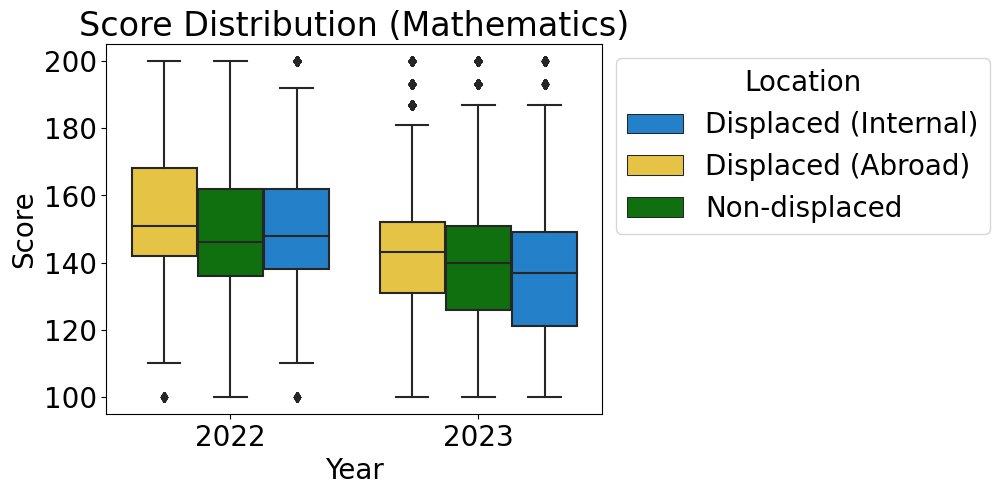

In [117]:
# Use seaborn boxplot to plot the scores
plt.rcParams['font.size'] = 20
data = df_math_graduated_passed[df_math_graduated_passed.year.isin([2022, 2023])]
sns.set_palette(['#ffd32a', 'green', '#0984e3'])
sns.boxplot(data, x='year', y='score100', hue='displacement_type')


plt.title(f'Score Distribution (Mathematics)')
plt.xlabel('Year')
plt.ylabel('Score')
plt.xticks()
plt.yticks()

handles, labels = plt.gca().get_legend_handles_labels()
# Define your new labels
new_labels = ['Displaced (Abroad)', 'Non-displaced', 'Displaced (Internal)']

order = [2,0,1]

#add legend to plot
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
# Create the legend with the new labels
plt.legend([handles[idx] for idx in order],[new_labels[idx] for idx in order], title='Location', bbox_to_anchor=(1, 1))

# plt.legend(title='Type', bbox_to_anchor=(1, 1), labels = ['Displaced (Abroad)', 'Non-displaced', 'Displaced (Internal)'])

# Adjust layout to make room for the legend
#plt.tight_layout()
# 
plt.show()


In [118]:
pivot = pd.pivot_table(data, index = ['displacement_type'], columns = ['year'], values=['score100'], aggfunc='count')
pivot

score100        
year                     2022    2023
displacement_type                    
Displaced_abroad        19945   16582
Displaced_internally    11840    9748
Non-displaced          123514  142077

/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nazardrushchak/opt/anaconda3/envs/my_conda_env_with_py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


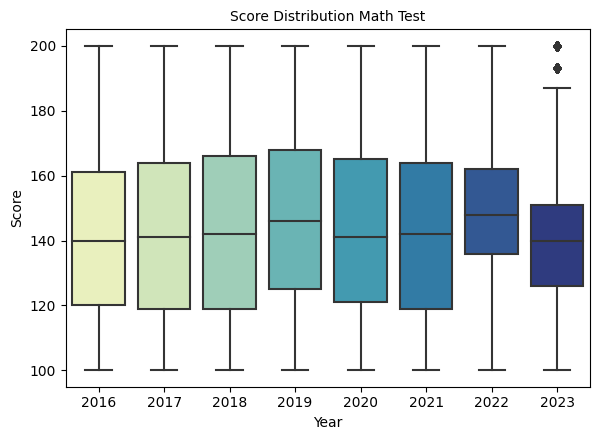

In [119]:


# Use seaborn boxplot to plot the scores
sns.boxplot(data=df_math_graduated_passed, x='year', y='score100',  palette='YlGnBu')

plt.title('Score Distribution Math Test', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Move the legend outside the plot
# plt.legend(title='Frontline Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()
